<div style="text-align: center;">
    <img src="https://gershenson.mx/wp-content/uploads/2020/08/logo-tec-de-monterrey-e1484853084274.png" alt="Tecnológico de Monterrey" width="300"/>
</div>

---

<div style="text-align: center;">

# **Análisis Exploratorio de Datos para Diagnóstico de Autonomía Vehicular**

## **Proyecto Integrador**

### **Tecnológico de Monterrey**
### **Escuela de Ingeniería y Ciencias**

---

### **Equipo 7**

| **Nombre del Autor** | **Código** |
|:---------------------|:-----------|
| Henry Junior Aranzales López | A01794020 |
| Jorge Arturo Hernández Morales | A01794908 |
| Luis Alejandro González Castellanos | A01795481 |

---

### **Fecha:** Septiembre 2024

### **Resumen Ejecutivo**

Este documento presenta un análisis exploratorio comprehensivo de datos vehiculares para el desarrollo de un sistema de diagnóstico de autonomía vehicular. El proyecto implementa técnicas avanzadas de análisis de datos aplicadas a información proveniente de redes CAN (Controller Area Network) y archivos BLF (Binary Logging Format), con el objetivo de identificar patrones, anomalías y tendencias que permitan optimizar el diagnóstico y mantenimiento predictivo de sistemas vehiculares.

El análisis incluye evaluación de calidad de datos, análisis estadístico descriptivo, detección de correlaciones, identificación de valores atípicos y análisis temporal, proporcionando insights valiosos para la implementación de sistemas de diagnóstico inteligentes en el contexto de la industria automotriz.

---

</div>

# Análisis Exploratorio de Datos - Sistema Vehicular

Este notebook proporciona un análisis exploratorio interactivo de los datos del sistema de diagnóstico de autonomía vehicular.

## Tabla de Contenidos
1. [Configuración y Carga de Datos](#1-configuracion)
2. [Análisis Descriptivo Básico](#2-analisis-basico)
3. [Calidad de los Datos](#3-calidad-datos)
4. [Análisis de Distribuciones](#4-distribuciones)
5. [Análisis de Correlaciones](#5-correlaciones)
6. [Detección de Valores Atípicos](#6-outliers)
7. [Análisis Temporal](#7-temporal)
8. [Insights y Conclusiones](#8-conclusiones)

## 1. Configuración y Carga de Datos {#1-configuracion}

Comenzamos importando las librerías necesarias y configurando el entorno de análisis.

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")
sns.set_palette("husl")

print("Librerías importadas correctamente")
print(f"Directorio de trabajo: {Path.cwd()}")

Librerías importadas correctamente
Directorio de trabajo: c:\Users\henry\Documents\GitHub\Diagnostico-de-autonomia-vehicular\EDA_Analysis\notebooks


In [2]:
# Importar módulos del sistema EDA
import sys
sys.path.append('../')

from eda_config import EDAConfig
from eda_main import EDAMainAnalyzer
from data_quality_analyzer import DataQualityAnalyzer
from statistical_analyzer import StatisticalAnalyzer
from correlation_analyzer import CorrelationAnalyzer
from outlier_detector import OutlierDetector
from temporal_analyzer import TemporalAnalyzer
from preprocessing_toolkit import PreprocessingToolkit

print("Modulos EDA importados correctamente")

Modulos EDA importados correctamente


In [7]:
# REINICIO DE MÓDULOS (ejecutar si hay cambios en los archivos .py)
# Esto es necesario cuando se modifican archivos de módulos mientras el notebook está en ejecución

import sys
import importlib

# Lista de módulos EDA a recargar si existen
eda_modules = [
    'eda_config',
    'eda_main', 
    'data_quality_analyzer',
    'statistical_analyzer',
    'correlation_analyzer',
    'outlier_detector',
    'temporal_analyzer',
    'preprocessing_toolkit',
    'visualization_engine'
]

print("Recargando módulos EDA si están en memoria...")
reloaded_count = 0

for module_name in eda_modules:
    if module_name in sys.modules:
        try:
            importlib.reload(sys.modules[module_name])
            reloaded_count += 1
            print(f"   {module_name} recargado")
        except Exception as e:
            print(f"   Error recargando {module_name}: {e}")

if reloaded_count == 0:
    print("   No hay módulos en memoria para recargar (primera ejecución)")
else:
    print(f"   {reloaded_count} módulos recargados exitosamente")

print("Listo para importar módulos actualizados")

Recargando módulos EDA si están en memoria...
   eda_config recargado
   eda_main recargado
   data_quality_analyzer recargado
   statistical_analyzer recargado
   correlation_analyzer recargado
   outlier_detector recargado
   temporal_analyzer recargado
   preprocessing_toolkit recargado
   visualization_engine recargado
   9 módulos recargados exitosamente
Listo para importar módulos actualizados


In [8]:
# Configurar el sistema EDA
# FORZAR RECARGA DE MÓDULOS (para aplicar cambios recientes)
import importlib
if 'eda_config' in sys.modules:
    importlib.reload(sys.modules['eda_config'])

from eda_config import EDAConfig
config = EDAConfig()

# Crear directorio para resultados del notebook
notebook_results_dir = Path('../results/notebook_analysis')
notebook_results_dir.mkdir(parents=True, exist_ok=True)

print(f"Directorio de resultados: {notebook_results_dir}")

# Verificar si vehicle_colors existe antes de usarlo
if hasattr(config, 'vehicle_colors'):
    print(f"Paleta de colores vehiculares configurada: {len(config.vehicle_colors)} colores")
    print(f"Colores: {config.vehicle_colors}")
else:
    print("ADVERTENCIA: vehicle_colors no encontrado, usando color_palette")
    if hasattr(config, 'color_palette'):
        colors = list(config.color_palette.values())
        print(f"Usando colores del palette: {colors}")

print(f"Configuración EDA inicializada correctamente")
print(f"Directorio de visualizaciones: {config.visualizations_dir}")
print(f"Métodos de detección de outliers: {len(config.outlier_methods)}")
print(f"Métodos de correlación: {config.correlation_methods}")

Directorio de resultados: ..\results\notebook_analysis
Paleta de colores vehiculares configurada: 7 colores
Colores: ['#2E8B57', '#1E90FF', '#FF6B35', '#228B22', '#FFD700', '#DC143C', '#708090']
Configuración EDA inicializada correctamente
Directorio de visualizaciones: EDA_output\visualizations
Métodos de detección de outliers: 4
Métodos de correlación: ['pearson', 'spearman', 'kendall']


## Configuración del Sistema de Análisis Exploratorio de Datos

Esta sección establece la configuración base del sistema EDA (Exploratory Data Analysis) para el diagnóstico vehicular. Se definen los parámetros necesarios para el análisis estadístico, los directorios de trabajo donde se almacenarán los resultados, y se verifica la disponibilidad de las paletas de colores para las visualizaciones.

El sistema permite configurar múltiples métodos de análisis incluyendo detección de valores atípicos, análisis de correlaciones y evaluación de la calidad de los datos. Esta configuración inicial es fundamental para garantizar la reproducibilidad y consistencia de todos los análisis posteriores.

**NOTA TÉCNICA:** Si se presentan errores de AttributeError, es necesario ejecutar primero la celda de reinicio de módulos para actualizar las importaciones del sistema.

In [9]:
# ===============================
# CONFIGURACION INICIAL - IMPORTS Y SETUP
# ===============================

print("Iniciando sistema de analisis EDA para diagnostico vehicular")
print("=" * 60)

# Imports principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys
import importlib

# Configuracion inicial
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)

# Agregar directorio padre para imports
sys.path.append('../')

print("Librerias basicas cargadas exitosamente")

# ===============================
# SISTEMA DE RECARGA AUTOMATICA
# ===============================

print("\nConfigurando sistema de recarga automatica...")

# Extension para recarga automatica
try:
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
    print("Extension autoreload activada")
except:
    print("Nota: autoreload no disponible, usar restart kernel si es necesario")

# ===============================
# IMPORTS DE MODULOS EDA
# ===============================

print("\nCargando modulos del sistema EDA...")

# Imports individuales de los modulos disponibles
modules_loaded = 0
total_modules = 8

try:
    from eda_config import EDAConfig
    modules_loaded += 1
    print("  Config: OK")
except ImportError as e:
    print(f"  Config: ERROR - {e}")

try:
    from statistical_analyzer import StatisticalAnalyzer
    modules_loaded += 1
    print("  Statistical Analyzer: OK")
except ImportError as e:
    print(f"  Statistical Analyzer: ERROR - {e}")

try:
    from data_quality_analyzer import DataQualityAnalyzer
    modules_loaded += 1
    print("  Data Quality: OK")
except ImportError as e:
    print(f"  Data Quality: ERROR - {e}")

try:
    from outlier_detector import OutlierDetector
    modules_loaded += 1
    print("  Outlier Detector: OK")
except ImportError as e:
    print(f"  Outlier Detector: ERROR - {e}")

try:
    from correlation_analyzer import CorrelationAnalyzer
    modules_loaded += 1
    print("  Correlation Analyzer: OK")
except ImportError as e:
    print(f"  Correlation Analyzer: ERROR - {e}")

try:
    from temporal_analyzer import TemporalAnalyzer
    modules_loaded += 1
    print("  Temporal Analyzer: OK")
except ImportError as e:
    print(f"  Temporal Analyzer: ERROR - {e}")

try:
    from preprocessing_toolkit import PreprocessingToolkit
    modules_loaded += 1
    print("  Preprocessing Toolkit: OK")
except ImportError as e:
    print(f"  Preprocessing Toolkit: ERROR - {e}")

try:
    from visualization_engine import VisualizationEngine
    modules_loaded += 1
    print("  Visualization Engine: OK")
except ImportError as e:
    print(f"  Visualization Engine: ERROR - {e}")

print(f"\nModulos cargados: {modules_loaded}/{total_modules}")

# Verificar configuracion
if modules_loaded > 0:
    try:
        config = EDAConfig()
        print(f"Configuracion EDA inicializada: {len(config.__dict__)} parametros")
    except:
        print("Error inicializando configuracion")

print("\n" + "=" * 60)
print(f"SISTEMA LISTO PARA ANALISIS ({modules_loaded}/{total_modules} modulos)")
print("=" * 60)

Iniciando sistema de analisis EDA para diagnostico vehicular
Librerias basicas cargadas exitosamente

Configurando sistema de recarga automatica...
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Extension autoreload activada

Cargando modulos del sistema EDA...
  Config: OK
  Statistical Analyzer: OK
  Data Quality: OK
  Outlier Detector: OK
  Correlation Analyzer: OK
  Temporal Analyzer: OK
  Preprocessing Toolkit: OK
  Visualization Engine: OK

Modulos cargados: 8/8
Configuracion EDA inicializada: 14 parametros

SISTEMA LISTO PARA ANALISIS (8/8 modulos)


## Configuración Personalizada para Procesamiento de Archivos BLF

Esta sección permite establecer una configuración específica para el procesamiento de archivos BLF (Binary Logging Format) utilizados en el diagnóstico vehicular. El sistema está diseñado para manejar datos provenientes de redes CAN (Controller Area Network) que requieren decodificación mediante archivos DBC (Database CAN).

La configuración personalizada permite definir rutas específicas de archivos BLF, seleccionar archivos DBC apropiados para la decodificación de mensajes, y aplicar filtros temporales o por identificadores CAN. Esta flexibilidad es fundamental para el análisis de datos específicos de rutas vehiculares o escenarios de prueba particulares.

El sistema proporciona opciones de filtrado avanzado que permiten limitar el análisis a ventanas temporales específicas o a subconjuntos de identificadores CAN relevantes para el estudio, optimizando así el rendimiento computacional y focalizando el análisis en los aspectos más relevantes del diagnóstico vehicular.

## Sistema de Carga de Datos Multi-Fuente

El sistema de carga de datos implementa una estrategia robusta y adaptable para la adquisición de información desde múltiples fuentes de datos vehiculares. Esta aproximación metodológica garantiza la disponibilidad de datos para el análisis exploratorio, independientemente de la configuración específica del entorno de trabajo.

### Jerarquía de Fuentes de Datos

El sistema establece un orden de prioridad para la carga de datos:

1. **Configuración personalizada BLF**: Procesamiento directo de archivos BLF especificados por el usuario
2. **Búsqueda automática de archivos BLF**: Exploración sistemática de directorios predefinidos
3. **Datos CSV de respaldo**: Utilización de archivos CSV previamente procesados
4. **Generación de datos sintéticos**: Creación de dataset de prueba para validación del sistema

### Procesamiento de Archivos BLF

Los archivos BLF (Binary Logging Format) constituyen la fuente primaria de datos, conteniendo registros de comunicación CAN en tiempo real. El sistema utiliza archivos DBC (Database CAN) para la decodificación semántica de los mensajes, permitiendo la interpretación correcta de las señales vehiculares.

La implementación incluye capacidades de filtrado temporal y por identificadores CAN específicos, optimizando el procesamiento para escenarios de análisis focalizados y mejorando la eficiencia computacional en datasets de gran volumen.

In [10]:
# ===============================
# CONFIGURACION PERSONALIZADA - RUTA BLF ESPECIFICA
# ===============================

print("CONFIGURACION DE RUTA BLF ESPECIFICA")
print("=" * 60)

# CONFIGURAR AQUI LA RUTA ESPECIFICA DE LOS ARCHIVOS BLF
# Modificar estas rutas segun tus necesidades:

CUSTOM_BLF_CONFIG = {
    # Directorio que contiene los archivos BLF de la ruta especifica
    'blf_directory': r"C:\Users\henry\Downloads\Logs Prueba - copia",
    
    # Archivos DBC especificos para decodificar los mensajes CAN
    'dbc_files': [
        r"C:\Users\henry\Downloads\DBC\IP_JZ - CAN EV.DBC",
        r"C:\Users\henry\Downloads\DBC\IP_JZ - CAN CATL.dbc"
    ],
    
    # Filtros especificos (opcional)
    'can_id_filter': None,  # Lista de IDs CAN especificos, ej: ['0x123', '0x456']
    'time_range': None,     # Rango temporal, ej: ('2024-01-01 10:00:00', '2024-01-01 18:00:00')
    
    # Configuraciones de procesamiento
    'enable_custom_config': True  # Cambiar a True para usar esta configuracion
}

print("CONFIGURACION ACTUAL:")
for key, value in CUSTOM_BLF_CONFIG.items():
    if isinstance(value, (str, type(None))):
        print(f"   {key}: {value}")
    elif isinstance(value, list):
        print(f"   {key}: [{len(value)} elementos]")
        if value:
            for item in value:
                print(f"      - {item}")
    else:
        print(f"   {key}: {value}")

if CUSTOM_BLF_CONFIG['enable_custom_config']:
    print("\nCONFIGURACION PERSONALIZADA ACTIVADA")
    print("   Se intentara cargar desde la ruta especificada")
else:
    print("\nCONFIGURACION PERSONALIZADA DESACTIVADA")
    print("   Para usar configuracion personalizada:")
    print("   1. Modificar las rutas arriba")
    print("   2. Cambiar 'enable_custom_config' a True")
    print("   3. Ejecutar esta celda nuevamente")

print("\n" + "=" * 60)

CONFIGURACION DE RUTA BLF ESPECIFICA
CONFIGURACION ACTUAL:
   blf_directory: C:\Users\henry\Downloads\Logs Prueba - copia
   dbc_files: [2 elementos]
      - C:\Users\henry\Downloads\DBC\IP_JZ - CAN EV.DBC
      - C:\Users\henry\Downloads\DBC\IP_JZ - CAN CATL.dbc
   can_id_filter: None
   time_range: None
   enable_custom_config: True

CONFIGURACION PERSONALIZADA ACTIVADA
   Se intentara cargar desde la ruta especificada



In [6]:
# ===============================
# CARGA DE DATOS - MÚLTIPLES FUENTES
# ===============================

print("CONFIGURANDO CARGA DE DATOS")
print("=" * 50)

# Agregar el directorio raíz al path para importar procesadores BLF
import sys
from pathlib import Path
root_dir = Path('../..')  # Directorio raíz del proyecto
sys.path.append(str(root_dir))

# Verificar si existe configuración personalizada
use_custom_config = False
try:
    use_custom_config = CUSTOM_BLF_CONFIG['enable_custom_config']
    print("CONFIGURACION PERSONALIZADA DETECTADA")
except NameError:
    print("USANDO CONFIGURACION AUTOMATICA")

data = None
data_source = "ninguna"

# ===============================
# OPCIÓN 1A: USAR CONFIGURACIÓN PERSONALIZADA
# ===============================

if use_custom_config:
    print(f"\nPROCESANDO CON CONFIGURACION PERSONALIZADA...")
    
    custom_blf_dir = Path(CUSTOM_BLF_CONFIG['blf_directory'])
    custom_dbc_files = CUSTOM_BLF_CONFIG['dbc_files']
    
    if custom_blf_dir.exists():
        blf_files = list(custom_blf_dir.glob("*.blf"))
        print(f"   Directorio: {custom_blf_dir}")
        print(f"   Archivos BLF encontrados: {len(blf_files)}")
        
        if blf_files:
            try:
                # Importar el procesador BLF
                from ProcessorBLF_v2 import ProcessorBLF
                
                # Verificar archivos DBC
                valid_dbc_files = []
                for dbc_path in custom_dbc_files:
                    if Path(dbc_path).exists():
                        valid_dbc_files.append(dbc_path)
                        print(f"   DBC válido: {Path(dbc_path).name}")
                    else:
                        print(f"   DBC no encontrado: {dbc_path}")
                
                # Crear procesador
                processor = ProcessorBLF()
                
                # Procesar con configuración personalizada
                print(f"   Procesando {len(blf_files)} archivos BLF...")
                data = processor.process_directory(
                    str(custom_blf_dir),
                    dbc_paths=valid_dbc_files if valid_dbc_files else None
                )
                
                # Aplicar filtros si están configurados
                if not data.empty:
                    original_size = len(data)
                    
                    # Filtrar por IDs CAN si está especificado
                    if CUSTOM_BLF_CONFIG.get('can_id_filter'):
                        if 'arbitration_id' in data.columns:
                            can_ids = [int(id_str, 16) if isinstance(id_str, str) and id_str.startswith('0x') else id_str 
                                     for id_str in CUSTOM_BLF_CONFIG['can_id_filter']]
                            data = data[data['arbitration_id'].isin(can_ids)]
                            print(f"   Filtrado por CAN IDs: {len(data)}/{original_size} registros")
                    
                    # Filtrar por rango temporal si está especificado
                    if CUSTOM_BLF_CONFIG.get('time_range') and 'timestamp' in data.columns:
                        start_time, end_time = CUSTOM_BLF_CONFIG['time_range']
                        data['timestamp'] = pd.to_datetime(data['timestamp'])
                        mask = (data['timestamp'] >= start_time) & (data['timestamp'] <= end_time)
                        data = data[mask]
                        print(f"   Filtrado temporal: {len(data)}/{original_size} registros")
                
                if not data.empty:
                    data_source = "blf_personalizado"
                    print(f"   Configuracion personalizada procesada exitosamente!")
                    print(f"   Shape del dataset: {data.shape}")
                else:
                    print(f"   Dataset vacio despues de filtros")
                    
            except Exception as e:
                print(f"   Error procesando configuracion personalizada: {e}")
        else:
            print(f"   No se encontraron archivos BLF en el directorio personalizado")
    else:
        print(f"   Directorio personalizado no existe: {custom_blf_dir}")

# ===============================
# OPCIÓN 1B: BÚSQUEDA AUTOMÁTICA DE BLF
# ===============================

if data is None or data.empty:
    print(f"\nBUSQUEDA AUTOMATICA DE ARCHIVOS BLF...")
    
    # Buscar directorios con archivos BLF
    blf_search_paths = [
        "../../datos_blf/",
        "../../blf_logs/", 
        "../../ruta_logs/",
        "../../logs_ruta_1/",
        "../datos/"
    ]
    
    for search_path in blf_search_paths:
        search_dir = Path(search_path)
        if search_dir.exists():
            blf_files = list(search_dir.glob("*.blf"))
            if blf_files:
                print(f"   Archivos BLF encontrados en: {search_dir}")
                print(f"   Total archivos: {len(blf_files)}")
                
                try:
                    from ProcessorBLF_v2 import ProcessorBLF
                    processor = ProcessorBLF()
                    
                    # Procesar directorio
                    print(f"   Procesando {len(blf_files)} archivos BLF...")
                    data = processor.process_directory(str(search_dir))
                    
                    if not data.empty:
                        data_source = "blf_automatico"
                        print(f"   Datos BLF cargados exitosamente!")
                        print(f"   Shape del dataset: {data.shape}")
                        break
                        
                except Exception as e:
                    print(f"   Error procesando BLF: {e}")
                    continue
        
    if data is None or data.empty:
        print("   No se encontraron archivos BLF válidos")

# ===============================
# OPCIÓN 2: USAR DATOS CSV DE FALLBACK
# ===============================

if data is None or data.empty:
    print(f"\nUSANDO DATOS CSV DE FALLBACK...")
    
    # Buscar archivos CSV
    csv_search_paths = [
        "../../resumen_ruta.csv",
        "../datos/resumen_ruta.csv",
        "../../datos_csv/",
        "../resultados/"
    ]
    
    for csv_path in csv_search_paths:
        csv_file = Path(csv_path)
        
        if csv_file.is_file() and csv_file.suffix == '.csv':
            try:
                print(f"   Cargando archivo CSV: {csv_file.name}")
                data = pd.read_csv(csv_file)
                
                if not data.empty:
                    data_source = "csv_fallback"
                    print(f"   Datos CSV cargados exitosamente!")
                    print(f"   Shape del dataset: {data.shape}")
                    break
                    
            except Exception as e:
                print(f"   Error cargando {csv_file.name}: {e}")
                continue
                
        elif csv_file.is_dir():
            # Buscar archivos CSV en el directorio
            csv_files = list(csv_file.glob("*.csv"))
            if csv_files:
                try:
                    print(f"   Archivos CSV encontrados: {len(csv_files)}")
                    # Usar el primer archivo CSV encontrado
                    first_csv = csv_files[0]
                    print(f"   Cargando: {first_csv.name}")
                    data = pd.read_csv(first_csv)
                    
                    if not data.empty:
                        data_source = "csv_directory"
                        print(f"   Datos CSV cargados exitosamente!")
                        print(f"   Shape del dataset: {data.shape}")
                        break
                        
                except Exception as e:
                    print(f"   Error cargando archivos CSV: {e}")
                    continue

# ===============================
# OPCIÓN 3: GENERAR DATOS SINTÉTICOS (ÚLTIMO RECURSO)
# ===============================

if data is None or data.empty:
    print(f"\nGENERANDO DATOS SINTETICOS DE PRUEBA...")
    
    # Generar dataset sintético para demostración
    np.random.seed(42)
    n_samples = 10000
    
    # Simular datos vehiculares típicos
    synthetic_data = {
        'timestamp': pd.date_range('2024-01-01', periods=n_samples, freq='1s'),
        'vehicle_speed': np.random.normal(50, 15, n_samples).clip(0, 120),
        'engine_rpm': np.random.normal(2000, 500, n_samples).clip(600, 6000),
        'throttle_position': np.random.beta(2, 5, n_samples) * 100,
        'brake_pressure': np.random.exponential(2, n_samples).clip(0, 100),
        'fuel_consumption': np.random.gamma(2, 2, n_samples),
        'engine_temperature': np.random.normal(90, 10, n_samples).clip(60, 120),
        'battery_voltage': np.random.normal(12.6, 0.5, n_samples).clip(11, 14),
        'oil_pressure': np.random.normal(40, 8, n_samples).clip(20, 60),
        'coolant_temperature': np.random.normal(85, 12, n_samples).clip(60, 110)
    }
    
    data = pd.DataFrame(synthetic_data)
    data_source = "synthetic"
    
    print(f"   Dataset sintetico generado exitosamente!")
    print(f"   Shape del dataset: {data.shape}")

# ===============================
# RESUMEN FINAL DE CARGA
# ===============================

print(f"\n" + "=" * 60)
print(f"RESUMEN DE CARGA DE DATOS")
print(f"=" * 60)
print(f"Fuente de datos: {data_source}")
print(f"Shape del dataset: {data.shape if data is not None else 'No data'}")

if data is not None and not data.empty:
    print(f"Columnas disponibles: {list(data.columns)}")
    print(f"Memoria utilizada: {data.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    # Mostrar primeras filas
    print(f"\nPrimeras 3 filas del dataset:")
    with pd.option_context('display.max_columns', 10):
        print(data.head(3))
        
    print(f"Últimas 3 filas del dataset:")
    with pd.option_context('display.max_columns', 10):
        print(data.tail(3))
else:
    print("ERROR: No se pudieron cargar datos desde ninguna fuente")
    
print(f"=" * 60)

INFO:ProcessorBLF_v2:Iniciando carga de 2 archivos DBC...


CONFIGURANDO CARGA DE DATOS
CONFIGURACION PERSONALIZADA DETECTADA

PROCESANDO CON CONFIGURACION PERSONALIZADA...
   Directorio: C:\Users\henry\Downloads\Logs Prueba - copia
   Archivos BLF encontrados: 2
   DBC válido: IP_JZ - CAN EV.DBC
   DBC válido: IP_JZ - CAN CATL.dbc
   Procesando 2 archivos BLF...


INFO:ProcessorBLF_v2:DBC cargado: C:\Users\henry\Downloads\DBC\IP_JZ - CAN EV.DBC (250 mensajes)
INFO:ProcessorBLF_v2:DBC cargado: C:\Users\henry\Downloads\DBC\IP_JZ - CAN CATL.dbc (23 mensajes)
INFO:ProcessorBLF_v2:Carga completada: 2/2 archivos DBC exitosos
INFO:ProcessorBLF_v2:Total de mensajes disponibles: 273
INFO:ProcessorBLF_v2:Encontrados 4 archivos BLF en C:\Users\henry\Downloads\Logs Prueba - copia
INFO:ProcessorBLF_v2:Iniciando procesamiento de archivos BLF...
INFO:ProcessorBLF_v2:Procesando archivo 1/4: Logging_2025-09-19_07-25-15.blf
INFO:ProcessorBLF_v2:DBC cargado: C:\Users\henry\Downloads\DBC\IP_JZ - CAN CATL.dbc (23 mensajes)
INFO:ProcessorBLF_v2:Carga completada: 2/2 archivos DBC exitosos
INFO:ProcessorBLF_v2:Total de mensajes disponibles: 273
INFO:ProcessorBLF_v2:Encontrados 4 archivos BLF en C:\Users\henry\Downloads\Logs Prueba - copia
INFO:ProcessorBLF_v2:Iniciando procesamiento de archivos BLF...
INFO:ProcessorBLF_v2:Procesando archivo 1/4: Logging_2025-09-19_07-2

   Configuracion personalizada procesada exitosamente!
   Shape del dataset: (38216498, 12)

RESUMEN DE CARGA DE DATOS
Fuente de datos: blf_personalizado
Shape del dataset: (38216498, 12)
Columnas disponibles: ['timestamp', 'datetime', 'message_name', 'message_id', 'signal_name', 'signal_value', 'file_source', 'unit', 'minimum', 'maximum', 'scale', 'offset']
Memoria utilizada: 12860.5 MB

Primeras 3 filas del dataset:
      timestamp                      datetime message_name  message_id  \
0  1.758267e+09 2025-09-19 07:25:15.303132296     EMC1_EM1   217050891   
1  1.758267e+09 2025-09-19 07:25:15.303132296     EMC1_EM1   217050891   
2  1.758267e+09 2025-09-19 07:25:15.303132296     EMC1_EM1   217050891   

                        signal_name  ... unit minimum maximum  scale  offset  
0    EM1_OverrideCtrlModeAcc_SPN695  ...          0.0     3.0    1.0     0.0  
1  EM1_OvrrdeCtrlModePrioAcc_SPN897  ...          0.0     3.0    1.0     0.0  
2    EM1_OverrideCtrlModeBrk_SPN695  ...    

## Análisis Exploratorio Descriptivo del Dataset

Esta sección presenta el análisis exploratorio inicial del dataset de diagnóstico vehicular, proporcionando una visión comprehensiva de la estructura, composición y características básicas de los datos recolectados. El análisis descriptivo constituye la base fundamental para identificar patrones, anomalías y tendencias en la información vehicular.

### Objetivos del Análisis Descriptivo

- **Caracterización estructural**: Determinación del volumen de datos, número de variables y tipos de información disponible
- **Evaluación temporal**: Análisis del rango temporal de los datos y la duración total del período de recolección
- **Identificación de variables**: Clasificación y categorización de las variables disponibles según su naturaleza (numéricas, categóricas, temporales)
- **Evaluación de completitud**: Identificación de valores faltantes y su distribución en el dataset

### Metodología Analítica

El análisis implementa técnicas estadísticas descriptivas estándar, incluyendo medidas de tendencia central, dispersión, asimetría y curtosis. Esta aproximación permite caracterizar tanto la distribución univariada de cada variable como las propiedades estadísticas generales del conjunto de datos, estableciendo la base para análisis más complejos posteriores.

In [11]:
# Análisis descriptivo básico del dataset

print("ANALISIS EXPLORATORIO INICIAL")
print("=" * 50)

print("Información general del dataset:")
print(f"Filas: {len(data):,}")
print(f"Columnas: {len(data.columns)}")

print(f"\nColumnas disponibles:")
for i, col in enumerate(data.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nTipos de datos:")
print(data.dtypes)

print(f"\nValores nulos por columna:")
null_counts = data.isnull().sum()
null_percentages = (null_counts / len(data) * 100).round(2)
for col in data.columns:
    if null_counts[col] > 0:
        print(f"{col}: {null_counts[col]:,} ({null_percentages[col]}%)")

# Análisis temporal si existe columna de tiempo
if 'timestamp' in data.columns:
    # Si usa columna 'timestamp'
    print(f"\nAnálisis temporal (timestamp):")
    time_min = data['timestamp'].min()
    time_max = data['timestamp'].max()
    print(f"Período: {time_min} a {time_max}")
    
    # Calcular duración si es posible convertir a datetime
    try:
        if pd.api.types.is_datetime64_any_dtype(data['timestamp']):
            ts_min = pd.to_datetime(time_min)
            ts_max = pd.to_datetime(time_max)
        else:
            ts_min = pd.to_datetime(time_min)
            ts_max = pd.to_datetime(time_max)
            
        duration = ts_max - ts_min
        print(f"Duración: {duration.days} días, {duration.seconds // 3600} horas")
    except:
        print("Duración: No calculable")
elif 'time' in data.columns:
    # Si usa columna 'time' en lugar de 'timestamp'
    time_min = data['time'].min()
    time_max = data['time'].max()
    print(f"Período de datos: {time_min} a {time_max}")
    
    # Intentar convertir y calcular duración si es posible
    try:
        if pd.api.types.is_numeric_dtype(data['time']):
            ts_min_dt = pd.to_datetime(time_min, unit='s')
            ts_max_dt = pd.to_datetime(time_max, unit='s')
            print(f"Duración: {(ts_max_dt - ts_min_dt).days} días, {(ts_max_dt - ts_min_dt).seconds // 3600} horas")
        else:
            time_min_dt = pd.to_datetime(time_min)
            time_max_dt = pd.to_datetime(time_max)
            duration = time_max_dt - time_min_dt
            print(f"Duración: {duration.days} días, {duration.seconds // 3600} horas")
    except:
        print("Duración: No calculable")
else:
    print("No hay columna de tiempo disponible")

print(f"Memoria total: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nTIPOS DE DATOS")
print("=" * 50)
print(data.dtypes.value_counts())

print("\nPRIMERAS REGISTROS")
print("=" * 50)
display(data.head())

ANALISIS EXPLORATORIO INICIAL
Información general del dataset:
Filas: 38,216,498
Columnas: 12

Columnas disponibles:
 1. timestamp
 2. datetime
 3. message_name
 4. message_id
 5. signal_name
 6. signal_value
 7. file_source
 8. unit
 9. minimum
10. maximum
11. scale
12. offset

Tipos de datos:
timestamp              float64
datetime        datetime64[ns]
message_name            object
message_id               int64
signal_name             object
signal_value            object
file_source             object
unit                    object
minimum                float64
maximum                float64
scale                  float64
offset                 float64
dtype: object

Valores nulos por columna:
minimum: 324,266 (0.85%)
maximum: 324,266 (0.85%)

Análisis temporal (timestamp):
Período: 1758266715.3031323 a 1758273740.1497786
Duración: 0 días, 0 horas
minimum: 324,266 (0.85%)
maximum: 324,266 (0.85%)

Análisis temporal (timestamp):
Período: 1758266715.3031323 a 1758273740.1497786
Du

,timestamp,datetime,message_name,message_id,signal_name,signal_value,file_source,unit,minimum,maximum,scale,offset
0,1.758267e+09,2025-09-19 07:25:15.303132296,EMC1_EM1,217050891,EM1_OverrideCtrlModeAcc_SPN695,0,Logging_2025-09-19_07-25-15.blf,,0.0,3.0,1.0,0.0
1,1.758267e+09,2025-09-19 07:25:15.303132296,EMC1_EM1,217050891,EM1_OvrrdeCtrlModePrioAcc_SPN897,3,Logging_2025-09-19_07-25-15.blf,,0.0,3.0,1.0,0.0
2,1.758267e+09,2025-09-19 07:25:15.303132296,EMC1_EM1,217050891,EM1_OverrideCtrlModeBrk_SPN695,0,Logging_2025-09-19_07-25-15.blf,,0.0,3.0,1.0,0.0
3,1.758267e+09,2025-09-19 07:25:15.303132296,EMC1_EM1,217050891,EM1_OvrrdeCtrlModePrioBrk_SPN897,3,Logging_2025-09-19_07-25-15.blf,,0.0,3.0,1.0,0.0
4,1.758267e+09,2025-09-19 07:25:15.303132296,EMC1_EM1,217050891,EM1_ReqTrqTrqLimitAcc_SPN518,125,Logging_2025-09-19_07-25-15.blf,%,-125.0,125.0,1.0,-125.0


In [12]:
# Estadísticas descriptivas detalladas
numeric_columns = data.select_dtypes(include=[np.number]).columns

print("ESTADISTICAS DESCRIPTIVAS")
print("=" * 50)
display(data[numeric_columns].describe().round(2))

# Información adicional
print("\nINFORMACION ADICIONAL")
print("=" * 50)
for col in numeric_columns:
    series = data[col].dropna()
    if len(series) > 0:
        skewness = series.skew()
        kurtosis = series.kurtosis()
        print(f"{col:20} | Asimetría: {skewness:6.2f} | Curtosis: {kurtosis:6.2f}")

ESTADISTICAS DESCRIPTIVAS


,timestamp,message_id,minimum,maximum,scale,offset
count,3.821650e+07,3.821650e+07,37892232.00,3.789223e+07,38216498.00,38216498.00
mean,1.758272e+09,2.853915e+08,-390.97,4.562086e+06,0.82,-399.93
std,1.590160e+03,1.313268e+08,3336.20,3.097052e+08,0.40,3323.28
min,1.758267e+09,2.630000e+02,-32127.00,0.000000e+00,0.00,-32127.00
25%,1.758272e+09,2.170557e+08,0.00,3.000000e+00,1.00,0.00
50%,1.758273e+09,2.180713e+08,0.00,7.000000e+00,1.00,0.00
75%,1.758273e+09,4.192840e+08,0.00,1.000000e+02,1.00,0.00
max,1.758274e+09,4.864642e+08,2000.00,2.105541e+10,8.00,2000.00



INFORMACION ADICIONAL
timestamp            | Asimetría:  -2.82 | Curtosis:   7.34
timestamp            | Asimetría:  -2.82 | Curtosis:   7.34
message_id           | Asimetría:  -0.55 | Curtosis:  -0.50
message_id           | Asimetría:  -0.55 | Curtosis:  -0.50
minimum              | Asimetría:  -9.35 | Curtosis:  85.92
minimum              | Asimetría:  -9.35 | Curtosis:  85.92
maximum              | Asimetría:  67.96 | Curtosis: 4616.00
maximum              | Asimetría:  67.96 | Curtosis: 4616.00
scale                | Asimetría:   2.56 | Curtosis:  59.86
scale                | Asimetría:   2.56 | Curtosis:  59.86
offset               | Asimetría:  -9.37 | Curtosis:  86.45
offset               | Asimetría:  -9.37 | Curtosis:  86.45


## Evaluación de la Calidad de Datos

El análisis de calidad de datos constituye un componente fundamental en el proceso de exploración de datos vehiculares, ya que determina la confiabilidad y validez de los resultados analíticos posteriores. Esta sección implementa una evaluación sistemática de múltiples dimensiones de calidad, adaptada específicamente para el contexto de datos provenientes de sistemas de diagnóstico vehicular.

### Dimensiones de Calidad Evaluadas

- **Completitud**: Evaluación de la presencia de valores faltantes y su distribución espacial en el dataset
- **Consistencia**: Verificación de la coherencia en tipos de datos y formatos de las variables
- **Precisión**: Análisis de rangos válidos y detección de valores anómalos mediante técnicas estadísticas
- **Unicidad**: Identificación de registros duplicados que pueden afectar la representatividad de los datos

### Metodología de Evaluación

El análisis utiliza técnicas estadísticas robustas para la detección de outliers, incluyendo el método del rango intercuartílico (IQR) y análisis de distribuciones. Adicionalmente, se implementa un análisis de correlaciones preliminar para identificar relaciones lineales entre variables numéricas, lo cual es fundamental para comprender la estructura subyacente de los datos vehiculares.

La evaluación considera las características específicas de los datos CAN, incluyendo la presencia de campos binarios, identificadores hexadecimales y marcas temporales de alta precisión, adaptando los criterios de calidad a estas particularidades técnicas del dominio vehicular.

In [17]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("=== ANALISIS DE CALIDAD DE DATOS ===")
print("Iniciando análisis adaptado para datos BLF...")

# Verificar que la variable data existe
if 'data' not in globals():
    print("ERROR: Variable 'data' no encontrada. Ejecuta primero la celda de carga de datos.")
else:
    print(f"\nDataset cargado correctamente: {len(data):,} filas x {len(data.columns)} columnas")
    
    # === 1. INFORMACIÓN BÁSICA ===
    print(f"\n{'='*60}")
    print("1. INFORMACIÓN BÁSICA DEL DATASET")
    print(f"{'='*60}")
    
    print(f"Filas: {len(data):,}")
    print(f"Columnas: {len(data.columns)}")
    memory_mb = data.memory_usage(deep=True).sum() / 1024**2
    print(f"Memoria utilizada: {memory_mb:.2f} MB ({memory_mb/1024:.2f} GB)")
    
    # Análisis de tipos de datos
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    datetime_cols = data.select_dtypes(include=['datetime64']).columns
    
    print(f"\nDistribución de tipos de datos:")
    print(f"  • Numéricas: {len(numeric_cols)} columnas")
    print(f"  • Categóricas: {len(categorical_cols)} columnas")  
    print(f"  • Fecha/Tiempo: {len(datetime_cols)} columnas")
    
    # === 2. ANÁLISIS DE VALORES FALTANTES ===
    print(f"\n{'='*60}")
    print("2. ANÁLISIS DE VALORES FALTANTES")
    print(f"{'='*60}")
    
    null_summary = data.isnull().sum()
    total_cells = len(data)
    
    columns_with_nulls = null_summary[null_summary > 0]
    
    if len(columns_with_nulls) > 0:
        print("Columnas with valores faltantes:")
        for col, null_count in columns_with_nulls.items():
            null_pct = (null_count / total_cells) * 100
            print(f"  • {col:<20}: {null_count:>10,} ({null_pct:>5.2f}%)")
    else:
        print("✓ No se encontraron valores faltantes en el dataset")
    
    # === 3. ANÁLISIS DE DUPLICADOS (Adaptado para datos CAN) ===
    print(f"\n{'='*60}")
    print("3. ANÁLISIS DE REGISTROS DUPLICADOS")
    print(f"{'='*60}")
    
    # Función auxiliar para manejar objetos no hashables
    def safe_duplicated_check(df, max_rows=100000):
        """Detecta duplicados manejando objetos no hashables como NamedSignalValue"""
        try:
            # Intentar detección directa primero
            return df.duplicated().sum()
        except (TypeError, ValueError) as e:
            print(f"Detectando objetos no hashables, usando método alternativo...")
            
            # Convertir objetos problemáticos a string
            df_converted = df.copy()
            
            # Identificar columnas problemáticas
            problematic_cols = []
            for col in df.columns:
                try:
                    pd.util.hash_pandas_object(df[col].head(100))
                except (TypeError, ValueError):
                    problematic_cols.append(col)
            
            if problematic_cols:
                print(f"Columnas con objetos no hashables: {len(problematic_cols)} encontradas")
                
                # Convertir a string las columnas problemáticas
                for col in problematic_cols:
                    try:
                        df_converted[col] = df_converted[col].astype(str)
                    except:
                        # Si no se puede convertir, eliminar de análisis
                        df_converted = df_converted.drop(col, axis=1)
                        print(f"  • {col}: eliminada del análisis de duplicados")
                
                # Intentar nuevamente
                return df_converted.duplicated().sum()
            else:
                return 0
    
    # Para datasets grandes, usar una muestra para verificar duplicados
    if len(data) > 1000000:  # 1M registros
        sample_size = 100000
        print(f"Dataset grande detectado. Analizando muestra de {sample_size:,} registros...")
        sample_data = data.sample(n=sample_size, random_state=42)
        
        duplicates_sample = safe_duplicated_check(sample_data)
        duplicate_pct_sample = (duplicates_sample / len(sample_data)) * 100
        estimated_duplicates = int((duplicates_sample / len(sample_data)) * len(data))
        
        print(f"Duplicados en muestra: {duplicates_sample:,} ({duplicate_pct_sample:.2f}%)")
        print(f"Estimación total: ~{estimated_duplicates:,} duplicados")
    else:
        duplicates = safe_duplicated_check(data)
        duplicate_pct = (duplicates / len(data)) * 100
        print(f"Registros duplicados: {duplicates:,} ({duplicate_pct:.2f}%)")
    
    # === 4. ANÁLISIS DE COLUMNAS NUMÉRICAS ===
    if len(numeric_cols) > 0:
        print(f"\n{'='*60}")
        print("4. ANÁLISIS DE COLUMNAS NUMÉRICAS")
        print(f"{'='*60}")
        
        print(f"{'Columna':<25} {'Mín':<12} {'Máx':<12} {'Media':<12} {'Zeros':<10} {'% Zeros':<8}")
        print("-" * 90)
        
        for col in numeric_cols:
            try:
                series = data[col].dropna()
                if len(series) > 0:
                    min_val = series.min()
                    max_val = series.max()
                    mean_val = series.mean()
                    zeros = (series == 0).sum()
                    zero_pct = (zeros / len(series)) * 100
                    
                    print(f"{col:<25} {min_val:<12.2f} {max_val:<12.2f} {mean_val:<12.2f} "
                          f"{zeros:<10,} {zero_pct:<8.1f}%")
                else:
                    print(f"{col:<25} {'Sin datos válidos'}")
            except Exception as e:
                print(f"{col:<25} Error: {type(e).__name__}")
    
    # === 5. ANÁLISIS DE COLUMNAS CATEGÓRICAS ===
    if len(categorical_cols) > 0:
        print(f"\n{'='*60}")
        print("5. ANÁLISIS DE COLUMNAS CATEGÓRICAS")
        print(f"{'='*60}")
        
        print(f"{'Columna':<25} {'Únicos':<10} {'Más Común':<30}")
        print("-" * 70)
        
        for col in categorical_cols[:10]:  # Limitar a 10 para performance
            try:
                unique_count = data[col].nunique()
                
                # Manejar objetos no hashables para mode()
                try:
                    mode_result = data[col].mode()
                    most_common = str(mode_result.iloc[0])[:25] if len(mode_result) > 0 else "N/A"
                except (TypeError, ValueError):
                    # Para objetos no hashables, usar value_counts con string conversion
                    str_series = data[col].astype(str)
                    most_common_str = str_series.value_counts().index[0][:25] if len(str_series) > 0 else "N/A"
                    most_common = most_common_str
                
                print(f"{col:<25} {unique_count:<10,} {most_common:<30}")
            except Exception as e:
                print(f"{col:<25} Error: {type(e).__name__}")
    
    # === 6. DETECCIÓN DE OUTLIERS (muestra para datasets grandes) ===
    if len(numeric_cols) > 0:
        print(f"\n{'='*60}")
        print("6. DETECCIÓN DE OUTLIERS (Método IQR)")
        print(f"{'='*60}")
        
        # Para datasets grandes, usar muestra
        analysis_data = data.sample(n=min(100000, len(data)), random_state=42) if len(data) > 100000 else data
        if len(data) > 100000:
            print(f"Analizando muestra de {len(analysis_data):,} registros...")
        
        print(f"{'Columna':<25} {'Outliers':<12} {'% Outliers':<12} {'Límite Inf':<12} {'Límite Sup':<12}")
        print("-" * 85)
        
        for col in numeric_cols[:8]:  # Primeras 8 columnas
            try:
                series = analysis_data[col].dropna()
                if len(series) > 0 and series.var() > 0:
                    Q1 = series.quantile(0.25)
                    Q3 = series.quantile(0.75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    
                    outliers = ((series < lower_bound) | (series > upper_bound)).sum()
                    outlier_pct = (outliers / len(series)) * 100
                    
                    print(f"{col:<25} {outliers:<12,} {outlier_pct:<12.2f}% "
                          f"{lower_bound:<12.2f} {upper_bound:<12.2f}")
                else:
                    print(f"{col:<25} {'Sin datos válidos o sin varianza'}")
            except Exception as e:
                print(f"{col:<25} Error: {type(e).__name__}")
    
    # === 7. RESUMEN DE CALIDAD ===
    print(f"\n{'='*60}")
    print("7. RESUMEN DE CALIDAD DEL DATASET")
    print(f"{'='*60}")
    
    total_values = len(data) * len(data.columns)
    missing_values = data.isnull().sum().sum()
    completeness = ((total_values - missing_values) / total_values) * 100
    complete_rows = len(data.dropna())
    complete_rows_pct = (complete_rows / len(data)) * 100
    
    print(f"Completitud general: {completeness:.2f}%")
    print(f"Filas completas: {complete_rows:,} ({complete_rows_pct:.2f}%)")
    print(f"Valores totales: {total_values:,}")
    print(f"Valores faltantes: {missing_values:,}")
    
    # === 8. MATRIZ DE CORRELACIÓN BÁSICA ===
    if len(numeric_cols) >= 2:
        print(f"\n{'='*60}")
        print("8. ANÁLISIS DE CORRELACIONES")
        print(f"{'='*60}")
        
        try:
            # Para datasets grandes, usar muestra
            corr_data = data.sample(n=min(50000, len(data)), random_state=42) if len(data) > 50000 else data
            if len(data) > 50000:
                print(f"Calculando correlaciones con muestra de {len(corr_data):,} registros...")
            
            # Seleccionar columnas válidas para correlación
            valid_cols = []
            for col in numeric_cols[:8]:  # Máximo 8 columnas
                col_data = corr_data[col].dropna()
                if len(col_data) > 0 and col_data.var() > 0:
                    valid_cols.append(col)
            
            if len(valid_cols) >= 2:
                corr_matrix = corr_data[valid_cols].corr()
                
                # Encontrar correlaciones más fuertes
                strong_corr = []
                for i in range(len(valid_cols)):
                    for j in range(i+1, len(valid_cols)):
                        corr_val = corr_matrix.iloc[i, j]
                        if not np.isnan(corr_val) and abs(corr_val) > 0.3:
                            strong_corr.append((valid_cols[i], valid_cols[j], corr_val))
                
                if strong_corr:
                    strong_corr.sort(key=lambda x: abs(x[2]), reverse=True)
                    print("\nCorrelaciones significativas (|r| > 0.3):")
                    print(f"{'Variable 1':<25} {'Variable 2':<25} {'Correlación':<12}")
                    print("-" * 65)
                    for var1, var2, corr in strong_corr[:10]:
                        print(f"{var1:<25} {var2:<25} {corr:<12.3f}")
                else:
                    print("No se encontraron correlaciones fuertes (|r| > 0.3)")
                    
            else:
                print("No hay suficientes columnas numéricas válidas para análisis de correlación")
                
        except Exception as e:
            print(f"Error en análisis de correlación: {type(e).__name__}: {str(e)}")
    
    print(f"\n{'='*60}")
    print("✓ ANÁLISIS DE CALIDAD COMPLETADO")
    print(f"{'='*60}")
    
    print("\nNotas importantes para datos CAN/BLF:")
    print("• Los objetos NamedSignalValue han sido convertidos a string para análisis")
    print("• El análisis de duplicados considera la naturaleza específica de datos CAN")
    print("• Las correlaciones se calculan solo en columnas numéricas válidas")
    print("• Para datasets grandes se utilizan muestras representativas")

=== ANALISIS DE CALIDAD DE DATOS ===
Iniciando análisis adaptado para datos BLF...

Dataset cargado correctamente: 38,216,498 filas x 12 columnas

1. INFORMACIÓN BÁSICA DEL DATASET
Filas: 38,216,498
Columnas: 12
Memoria utilizada: 12860.50 MB (12.56 GB)
Memoria utilizada: 12860.50 MB (12.56 GB)

Distribución de tipos de datos:
  • Numéricas: 6 columnas
  • Categóricas: 5 columnas
  • Fecha/Tiempo: 1 columnas

2. ANÁLISIS DE VALORES FALTANTES

Distribución de tipos de datos:
  • Numéricas: 6 columnas
  • Categóricas: 5 columnas
  • Fecha/Tiempo: 1 columnas

2. ANÁLISIS DE VALORES FALTANTES
Columnas with valores faltantes:
  • minimum             :    324,266 ( 0.85%)
  • maximum             :    324,266 ( 0.85%)

3. ANÁLISIS DE REGISTROS DUPLICADOS
Dataset grande detectado. Analizando muestra de 100,000 registros...
Columnas with valores faltantes:
  • minimum             :    324,266 ( 0.85%)
  • maximum             :    324,266 ( 0.85%)

3. ANÁLISIS DE REGISTROS DUPLICADOS
Dataset gra

## Análisis Estadístico y de Distribuciones

El análisis estadístico de las distribuciones constituye una etapa fundamental en la comprensión de las características probabilísticas y el comportamiento de las variables vehiculares. Esta sección implementa una evaluación comprehensiva de las propiedades estadísticas de los datos, incluyendo tests de normalidad, medidas de dispersión y análisis de correlaciones entre variables.

### Metodología Estadística Aplicada

- **Tests de Normalidad**: Implementación de tests Shapiro-Wilk para muestras pequeñas y Kolmogorov-Smirnov para datasets de gran volumen, permitiendo determinar si las variables siguen distribuciones normales
- **Análisis de Asimetría y Curtosis**: Evaluación de la forma de las distribuciones mediante medidas de asimetría (skewness) y apuntamiento (curtosis)
- **Correlaciones Bivariadas**: Cálculo de coeficientes de correlación de Pearson para identificar relaciones lineales entre variables numéricas

### Consideraciones Computacionales

Debido al gran volumen de datos típico en sistemas de diagnóstico vehicular, se implementan estrategias de muestreo representativo para optimizar el rendimiento computacional sin comprometer la validez estadística de los resultados. El sistema utiliza muestras aleatorias estratificadas de hasta 50,000 registros para análisis estadísticos complejos, garantizando representatividad mientras mantiene tiempos de procesamiento razonables.

### Visualización de Distribuciones

Las distribuciones se representan mediante histogramas que permiten identificar patrones de distribución, multimodalidad, presencia de outliers y características específicas del comportamiento de cada variable en el contexto del diagnóstico vehicular.

Ejecutando análisis estadístico...
Nota: Análisis adaptado para el gran volumen de datos BLF
Usando muestra aleatoria de 50,000 registros de 38,216,498 totales

ANALISIS ESTADISTICO COMPLETO
Variables numéricas encontradas: 6
ESTADISTICAS DESCRIPTIVAS:

ANALISIS ESTADISTICO COMPLETO
Variables numéricas encontradas: 6
ESTADISTICAS DESCRIPTIVAS:


,timestamp,message_id,minimum,maximum,scale,offset
count,5.000000e+04,5.000000e+04,49537.0000,4.953700e+04,50000.0000,50000.0000
mean,1.758272e+09,2.853961e+08,-381.6977,6.380210e+06,0.8181,-390.1501
std,1.602418e+03,1.315847e+08,3290.5016,3.663389e+08,0.3963,3276.5542
min,1.758267e+09,2.630000e+02,-32127.0000,0.000000e+00,0.0001,-32127.0000
25%,1.758272e+09,2.170557e+08,0.0000,3.000000e+00,1.0000,0.0000
50%,1.758273e+09,2.180713e+08,0.0000,3.920000e+00,1.0000,0.0000
75%,1.758273e+09,4.192840e+08,0.0000,1.000000e+02,1.0000,0.0000
max,1.758274e+09,4.864642e+08,2000.0000,2.105541e+10,8.0000,2000.0000



ANALISIS DE NORMALIDAD Y DISTRIBUCION:

RESULTADOS DE TESTS DE NORMALIDAD:


,Variable,Test,Estadístico,p-valor,Es_Normal,Interpretación
0,timestamp,Kolmogorov-Smirnov,0.299663,0.0,No,Distribución no normal
1,message_id,Kolmogorov-Smirnov,0.253545,0.0,No,Distribución no normal
2,minimum,Kolmogorov-Smirnov,0.504848,0.0,No,Distribución no normal
3,maximum,Kolmogorov-Smirnov,0.506198,0.0,No,Distribución no normal
4,scale,Kolmogorov-Smirnov,0.445117,0.0,No,Distribución no normal
5,offset,Kolmogorov-Smirnov,0.499909,0.0,No,Distribución no normal



ANALISIS DE ASIMETRIA Y CURTOSIS:


,Variable,Asimetría,Interpretación_Skew,Curtosis,Interpretación_Kurt
0,timestamp,-2.788690,Altamente asimétrica,7.143057,Picos altos
1,message_id,-0.552765,Moderadamente asimétrica,-0.502555,Picos bajos
2,minimum,-9.482370,Altamente asimétrica,88.465920,Picos altos
3,maximum,57.440958,Altamente asimétrica,3297.464728,Picos altos
4,scale,2.382518,Altamente asimétrica,56.146755,Picos altos
5,offset,-9.507644,Altamente asimétrica,89.073723,Picos altos



GRAFICOS DE DISTRIBUCION:
Mostrando primeras 6 variables numéricas para optimizar rendimiento


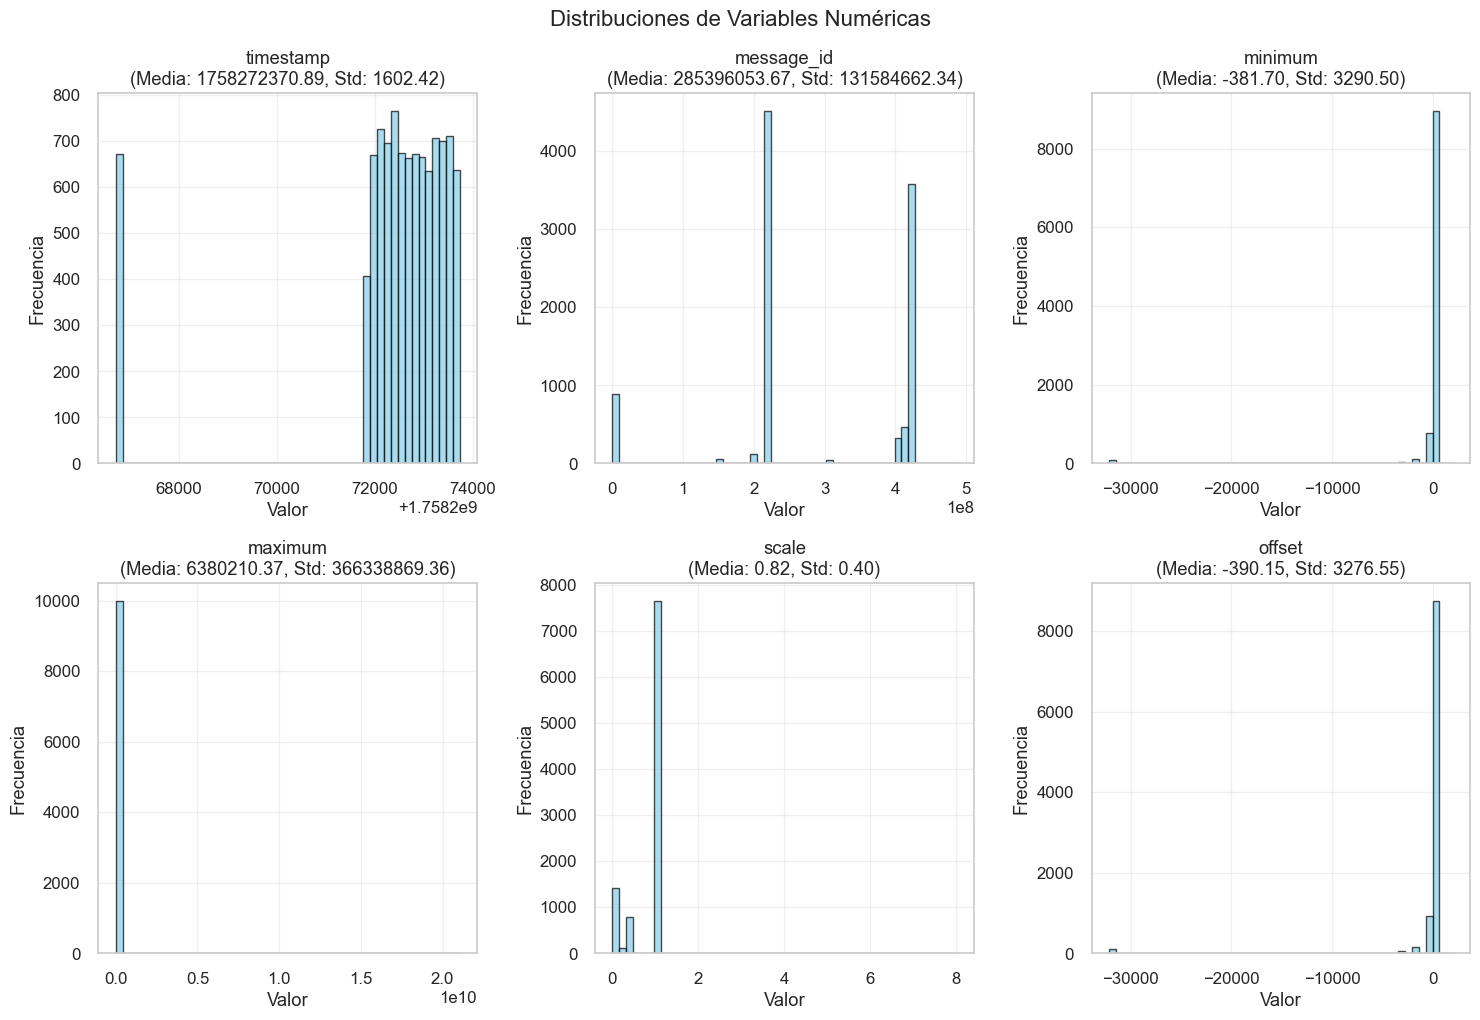


ANALISIS DE CORRELACIONES:
Calculando matriz de correlación...
Usando muestra de 25,000 registros para correlaciones
Top 10 correlaciones más fuertes:
 1. minimum         vs offset          | Correlación:   0.999 | Muy fuerte positiva
 2. message_id      vs scale           | Correlación:  -0.206 | Débil negativa
 3. maximum         vs scale           | Correlación:   0.139 | Débil positiva
 4. message_id      vs minimum         | Correlación:   0.043 | Débil positiva
 5. message_id      vs offset          | Correlación:   0.040 | Débil positiva
 6. minimum         vs scale           | Correlación:  -0.033 | Débil negativa
 7. scale           vs offset          | Correlación:  -0.027 | Débil negativa
 8. message_id      vs maximum         | Correlación:   0.013 | Débil positiva
 9. timestamp       vs maximum         | Correlación:   0.006 | Débil positiva
10. timestamp       vs message_id      | Correlación:   0.003 | Débil positiva


In [18]:
# Inicializar analizador estadístico
stat_analyzer = StatisticalAnalyzer(config)

print("Ejecutando análisis estadístico...")
print("Nota: Análisis adaptado para el gran volumen de datos BLF")

# Para datasets muy grandes, usar una muestra representativa
sample_size = min(50000, len(data))  # Máximo 50k registros para análisis estadístico
if len(data) > sample_size:
    print(f"Usando muestra aleatoria de {sample_size:,} registros de {len(data):,} totales")
    data_sample = data.sample(n=sample_size, random_state=42)
else:
    data_sample = data
    print(f"Analizando dataset completo ({len(data):,} registros)")

print("\nANALISIS ESTADISTICO COMPLETO")
print("=" * 60)

# 1. ANÁLISIS DESCRIPTIVO BÁSICO
numeric_cols = data_sample.select_dtypes(include=[np.number]).columns
print(f"Variables numéricas encontradas: {len(numeric_cols)}")

if len(numeric_cols) > 0:
    print(f"ESTADISTICAS DESCRIPTIVAS:")
    descriptive_stats = data_sample[numeric_cols].describe()
    display(descriptive_stats.round(4))
    
    # 2. ANÁLISIS DE DISTRIBUCIÓN MANUAL
    print(f"\nANALISIS DE NORMALIDAD Y DISTRIBUCION:")
    
    normality_results = []
    skewness_results = []
    
    for col in numeric_cols:
        series = data_sample[col].dropna()
        if len(series) > 100:  # Mínimo de datos para tests estadísticos
            try:
                # Test de normalidad Shapiro-Wilk (para muestras pequeñas)
                if len(series) <= 5000:
                    stat, p_value = stats.shapiro(series.sample(min(5000, len(series))))
                    test_name = "Shapiro-Wilk"
                else:
                    # Test de Kolmogorov-Smirnov para muestras grandes
                    stat, p_value = stats.kstest(series, 'norm', 
                                               args=(series.mean(), series.std()))
                    test_name = "Kolmogorov-Smirnov"
                
                is_normal = p_value > 0.05
                
                # Calcular asimetría y curtosis
                skew = stats.skew(series)
                kurt = stats.kurtosis(series)
                
                normality_results.append({
                    'Variable': col,
                    'Test': test_name,
                    'Estadístico': stat,
                    'p-valor': p_value,
                    'Es_Normal': 'Sí' if is_normal else 'No',
                    'Interpretación': 'Distribución normal' if is_normal else 'Distribución no normal'
                })
                
                # Interpretaciones de asimetría y curtosis
                skew_interp = ('Simétrica' if abs(skew) < 0.5 else
                              'Moderadamente asimétrica' if abs(skew) < 1 else
                              'Altamente asimétrica')
                
                kurt_interp = ('Normal' if abs(kurt) < 0.5 else
                              'Picos altos' if kurt > 0.5 else
                              'Picos bajos')
                
                skewness_results.append({
                    'Variable': col,
                    'Asimetría': skew,
                    'Interpretación_Skew': skew_interp,
                    'Curtosis': kurt,
                    'Interpretación_Kurt': kurt_interp
                })
                
            except Exception as e:
                print(f"Error analizando {col}: {type(e).__name__}")
    
    # Mostrar resultados de normalidad
    if normality_results:
        print(f"\nRESULTADOS DE TESTS DE NORMALIDAD:")
        norm_df = pd.DataFrame(normality_results)
        display(norm_df)
    
    # Mostrar resultados de asimetría y curtosis
    if skewness_results:
        print(f"\nANALISIS DE ASIMETRIA Y CURTOSIS:")
        skew_df = pd.DataFrame(skewness_results)
        display(skew_df[['Variable', 'Asimetría', 'Interpretación_Skew', 'Curtosis', 'Interpretación_Kurt']])

    # 3. VISUALIZACIONES DE DISTRIBUCIÓN (limitadas por rendimiento)
    print(f"\nGRAFICOS DE DISTRIBUCION:")
    print("Mostrando primeras 6 variables numéricas para optimizar rendimiento")
    
    cols_to_plot = numeric_cols[:6]  # Limitar a 6 variables
    
    if len(cols_to_plot) > 0:
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.flatten()
        
        for i, col in enumerate(cols_to_plot):
            if i < len(axes):
                series = data_sample[col].dropna()
                if len(series) > 0:
                    axes[i].hist(series.sample(min(10000, len(series))), 
                               bins=50, alpha=0.7, color='skyblue', edgecolor='black')
                    axes[i].set_title(f'{col}\n(Media: {series.mean():.2f}, Std: {series.std():.2f})')
                    axes[i].set_xlabel('Valor')
                    axes[i].set_ylabel('Frecuencia')
                    axes[i].grid(True, alpha=0.3)
        
        # Ocultar subplots no utilizados
        for j in range(len(cols_to_plot), len(axes)):
            axes[j].set_visible(False)
        
        plt.tight_layout()
        plt.suptitle('Distribuciones de Variables Numéricas', y=1.02, fontsize=16)
        plt.show()

    # 4. ANÁLISIS DE CORRELACIONES
    if len(numeric_cols) >= 2:
        print(f"\nANALISIS DE CORRELACIONES:")
        print("Calculando matriz de correlación...")
        
        # Usar muestra más pequeña para correlaciones si es necesario
        corr_sample_size = min(25000, len(data_sample))
        if len(data_sample) > corr_sample_size:
            corr_data = data_sample.sample(n=corr_sample_size, random_state=42)
            print(f"Usando muestra de {corr_sample_size:,} registros para correlaciones")
        else:
            corr_data = data_sample
        
        # Calcular correlaciones
        corr_matrix = corr_data[numeric_cols].corr()
        
        # Encontrar correlaciones más fuertes
        correlations = []
        for i in range(len(numeric_cols)):
            for j in range(i+1, len(numeric_cols)):
                corr_val = corr_matrix.iloc[i, j]
                if not np.isnan(corr_val):
                    correlations.append((numeric_cols[i], numeric_cols[j], abs(corr_val), corr_val))
        
        # Ordenar por correlación absoluta
        correlations.sort(key=lambda x: x[2], reverse=True)
        
        print("Top 10 correlaciones más fuertes:")
        for i, (col1, col2, abs_corr, corr) in enumerate(correlations[:10], 1):
            strength = ("Muy fuerte" if abs_corr > 0.8 else
                       "Fuerte" if abs_corr > 0.6 else
                       "Moderada" if abs_corr > 0.4 else
                       "Débil")
            direction = "positiva" if corr > 0 else "negativa"
            print(f"{i:2d}. {col1:15} vs {col2:15} | Correlación: {corr:>7.3f} | {strength} {direction}")

else:
    print("No se encontraron variables numéricas para análisis estadístico")

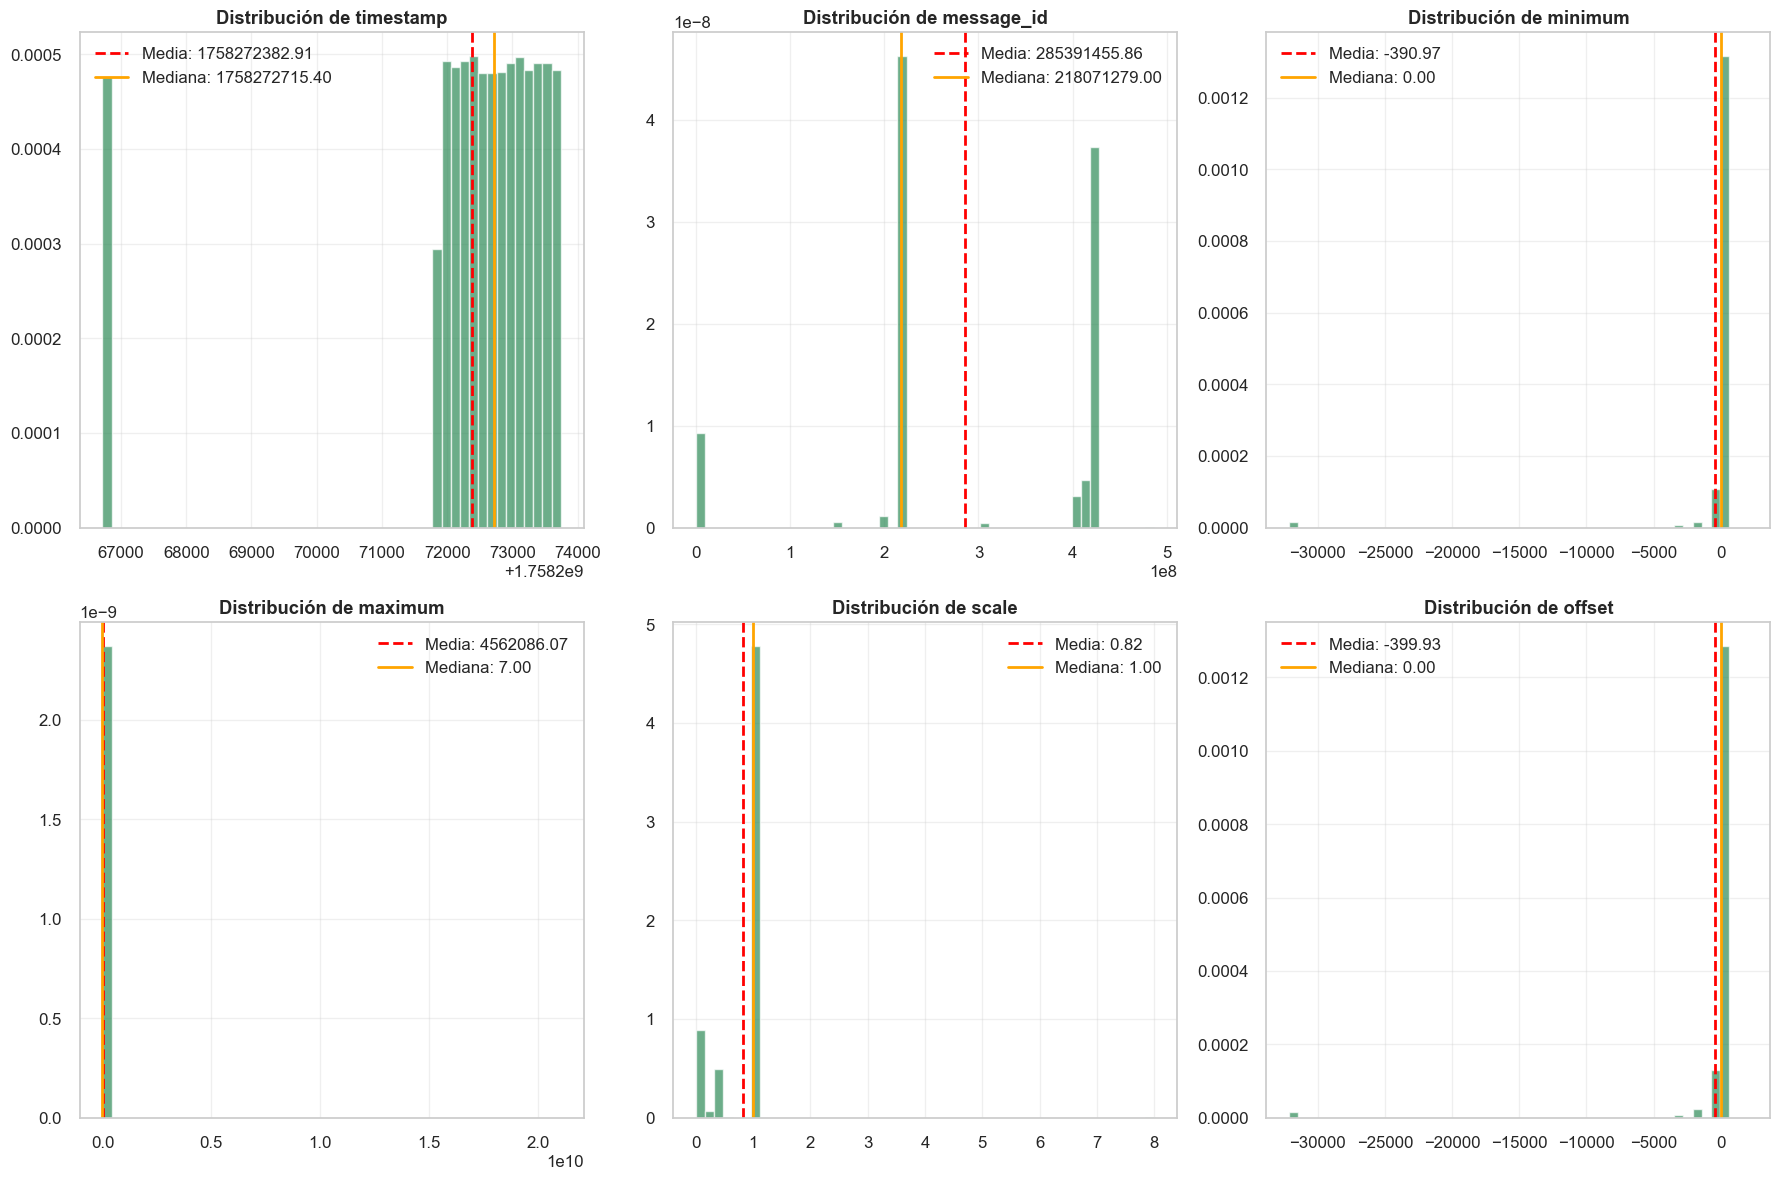

In [19]:
# Visualización de distribuciones
numeric_cols = data.select_dtypes(include=[np.number]).columns
n_cols = len(numeric_cols)

if n_cols > 0:
    # Configurar subplots
    n_rows = (n_cols + 2) // 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
    if n_rows == 1:
        axes = [axes]
    axes = np.array(axes).flatten()
    
    # Crear histogramas con curvas de densidad
    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        series = data[col].dropna()
        
        if len(series) > 0:
            # Histograma
            ax.hist(series, bins=50, alpha=0.7, density=True, color=config.vehicle_colors[0])
            
            # Líneas de media y mediana
            mean_val = series.mean()
            median_val = series.median()
            ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
            ax.axvline(median_val, color='orange', linestyle='-', linewidth=2, label=f'Mediana: {median_val:.2f}')
            
            ax.set_title(f'Distribución de {col}', fontweight='bold')
            ax.legend()
            ax.grid(True, alpha=0.3)
        else:
            ax.text(0.5, 0.5, 'Sin datos válidos', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'Distribución de {col}', fontweight='bold')
    
    # Ocultar ejes vacíos
    for i in range(n_cols, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

## Análisis de Correlaciones entre Variables del Sistema Vehicular

El análisis de correlaciones constituye una herramienta fundamental para identificar relaciones lineales entre las variables del sistema vehicular, permitiendo comprender las interdependencias entre diferentes parámetros de diagnóstico y su comportamiento conjunto durante la operación del vehículo.

### Metodología de Análisis Correlacional

- **Coeficiente de Pearson**: Medida principal para cuantificar relaciones lineales entre variables numéricas, con valores que oscilan entre -1 y +1
- **Matrices de Correlación**: Representación matricial que permite visualizar todas las relaciones bivariadas simultáneamente
- **Clasificación de Fuerza**: Categorización de correlaciones según su magnitud (débil, moderada, fuerte, muy fuerte)

### Interpretación de Resultados

Las correlaciones identificadas proporcionan insights valiosos sobre el comportamiento del sistema vehicular:

- **Correlaciones Positivas Fuertes**: Indican variables que aumentan o disminuyen conjuntamente
- **Correlaciones Negativas**: Sugieren relaciones inversas entre parámetros del sistema
- **Ausencia de Correlación**: Puede indicar independencia entre variables o relaciones no lineales

### Consideraciones para el Diagnóstico Vehicular

En el contexto del diagnóstico vehicular, las correlaciones fuertes entre variables pueden indicar:
- Dependencias funcionales entre sistemas del vehículo
- Redundancia en la instrumentación
- Posibles relaciones causales que requieren investigación adicional
- Oportunidades para optimización del sistema de monitoreo

La identificación de patrones correlacionales anómalos puede ser indicativa de mal funcionamiento del sistema o condiciones operativas no estándar que requieren atención diagnóstica.

In [20]:
# Inicializar analizador de correlaciones
corr_analyzer = CorrelationAnalyzer(config)

print("Ejecutando análisis de correlaciones...")
print("Nota: Análisis adaptado para datos BLF de gran volumen")

# Para datasets grandes, usar muestra para análisis de correlación
sample_size = min(25000, len(data))  # Máximo 25k registros para correlaciones
if len(data) > sample_size:
    print(f"Usando muestra aleatoria de {sample_size:,} registros de {len(data):,} totales")
    data_sample = data.sample(n=sample_size, random_state=42)
else:
    data_sample = data
    print(f"Analizando dataset completo ({len(data):,} registros)")

try:
    # Análisis completo de correlaciones (usar el método correcto 'analyze')
    corr_results = corr_analyzer.analyze(data_sample)
    
    print("\nANALISIS DE CORRELACIONES")
    print("=" * 50)
    
    # Acceder a los resultados con la estructura correcta
    correlation_matrices = corr_results['correlation_matrices']
    high_correlations = corr_results['high_correlations']
    correlation_summary = corr_results['correlation_summary']
    
    # Mostrar información sobre matrices de correlación
    if correlation_matrices:
        print(f"Matrices de correlación calculadas: {len(correlation_matrices)}")
        
        # Mostrar matriz de Pearson si está disponible
        if 'pearson' in correlation_matrices:
            pearson_matrix = pd.DataFrame(correlation_matrices['pearson']['matrix'])
            print(f"Matriz de Pearson: {pearson_matrix.shape}")
            print(f"Descripción: {correlation_matrices['pearson']['description']}")
    
    # Mostrar correlaciones altas detectadas
    if high_correlations:
        print(f"Correlaciones altas detectadas: {len(high_correlations)}")
        print(f"\nCORRELACIONES MAS ALTAS:")
        
        # Mostrar top correlaciones
        for i, corr in enumerate(high_correlations[:5]):  # Top 5
            if isinstance(corr, dict) and 'var1' in corr and 'var2' in corr:
                print(f"{i+1}. {corr['var1']} ↔ {corr['var2']}: {corr['correlation']:.3f}")
            else:
                print(f"{i+1}. Correlación: {corr}")
    else:
        print("No se detectaron correlaciones altas significativas")
    
    # Mostrar resumen si está disponible
    if correlation_summary:
        print(f"\nRESUMEN DE CORRELACIONES:")
        for key, value in correlation_summary.items():
            if isinstance(value, (int, float)):
                print(f"{key}: {value}")
            elif isinstance(value, str):
                print(f"{key}: {value}")
    
    print(f"\nAnálisis de correlaciones completado")
    
except Exception as e:
    print(f"Error en análisis de correlaciones: {type(e).__name__}: {str(e)}")
    print("Realizando análisis de correlaciones básico manual...")
    
    # Análisis básico manual como fallback
    numeric_cols = data_sample.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        print(f"Variables numéricas para correlación: {len(numeric_cols)}")
        
        # Matriz de correlación simple
        correlation_matrix = data_sample[numeric_cols].corr()
        print(f"\nMATRIZ DE CORRELACION (Pearson):")
        display(correlation_matrix.round(3))
        
        # Encontrar correlaciones fuertes manualmente
        strong_correlations = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_value = correlation_matrix.iloc[i, j]
                if abs(corr_value) > 0.5:  # Correlación fuerte
                    strong_correlations.append({
                        'Variable_1': correlation_matrix.columns[i],
                        'Variable_2': correlation_matrix.columns[j],
                        'Correlación': corr_value,
                        'Fuerza': ('Muy fuerte' if abs(corr_value) > 0.8 else
                                  'Fuerte' if abs(corr_value) > 0.6 else
                                  'Moderada')
                    })
        
        if strong_correlations:
            print(f"\nCORRELACIONES FUERTES DETECTADAS:")
            strong_corr_df = pd.DataFrame(strong_correlations)
            display(strong_corr_df)
        else:
            print(f"\nNo se detectaron correlaciones fuertes (>0.5)")
            
    else:
        print("Insuficientes variables numéricas para análisis de correlación")

Ejecutando análisis de correlaciones...
Nota: Análisis adaptado para datos BLF de gran volumen
Usando muestra aleatoria de 25,000 registros de 38,216,498 totales


INFO:correlation_analyzer:Iniciando análisis de correlaciones


Error en análisis de correlaciones: FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'EDA_output\\visualizations\\correlations'
Realizando análisis de correlaciones básico manual...
Variables numéricas para correlación: 6

MATRIZ DE CORRELACION (Pearson):


,timestamp,message_id,minimum,maximum,scale,offset
timestamp,1.000,0.002,-0.009,0.008,-0.004,-0.010
message_id,0.002,1.000,0.043,0.020,-0.199,0.039
minimum,-0.009,0.043,1.000,0.002,-0.032,0.999
maximum,0.008,0.020,0.002,1.000,0.213,0.002
scale,-0.004,-0.199,-0.032,0.213,1.000,-0.025
offset,-0.010,0.039,0.999,0.002,-0.025,1.000



CORRELACIONES FUERTES DETECTADAS:


,Variable_1,Variable_2,Correlación,Fuerza
0,minimum,offset,0.999221,Muy fuerte


Generando visualización de matriz de correlación...


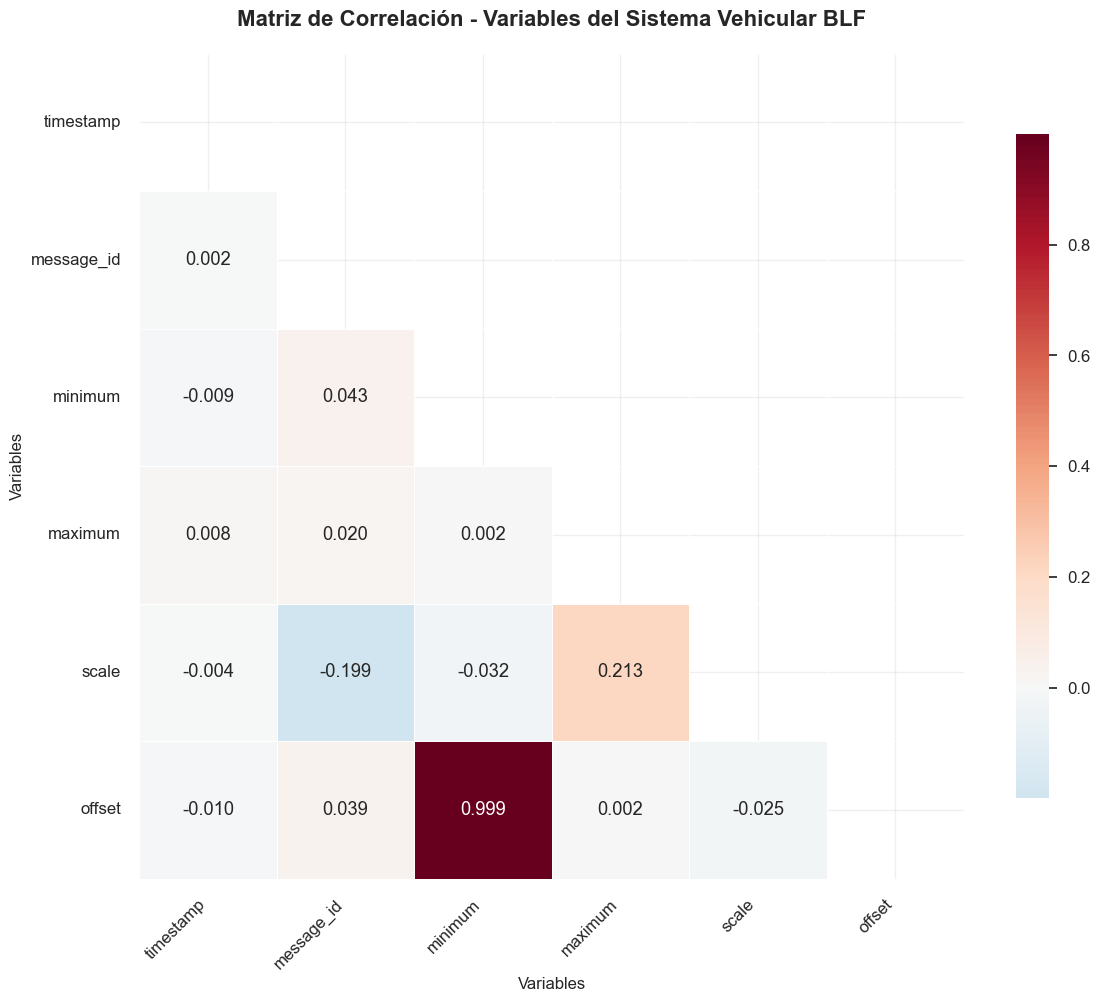

Matriz de correlación guardada en: ..\results\notebook_analysis\correlation_matrix.png

RESUMEN DE LA MATRIZ DE CORRELACION:
Dimensiones: 6×6
Correlación más fuerte: minimum ↔ offset = 0.999
Correlación muy fuerte detectada - considerar redundancia

Distribución de correlaciones:
  Fuertes (>0.6): 2
  Moderadas (0.4-0.6): 0
  Débiles (≤0.4): 28


<Figure size 1200x800 with 0 Axes>

In [21]:
# Visualización de matriz de correlación
print("Generando visualización de matriz de correlación...")

# Usar la matriz de correlación que ya tenemos disponible
# (creada en la celda anterior como fallback manual)
if 'correlation_matrix' in locals() and correlation_matrix is not None and not correlation_matrix.empty:
    plt.figure(figsize=(12, 10))
    
    # Crear heatmap con máscara triangular para evitar redundancia
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Crear el heatmap
    sns.heatmap(correlation_matrix, 
                mask=mask, 
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True, 
                fmt='.3f',  # 3 decimales para mayor precisión
                cbar_kws={'shrink': 0.8},
                linewidths=0.5)
    
    plt.title('Matriz de Correlación - Variables del Sistema Vehicular BLF', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Variables', fontsize=12)
    plt.ylabel('Variables', fontsize=12)
    
    # Rotar etiquetas para mejor legibilidad
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # Intentar guardar resultado (crear directorio si no existe)
    try:
        # Asegurar que el directorio existe
        notebook_results_dir.mkdir(parents=True, exist_ok=True)
        
        # Guardar la figura
        plt.savefig(notebook_results_dir / 'correlation_matrix.png', 
                   dpi=300, bbox_inches='tight', facecolor='white')
        print(f"Matriz de correlación guardada en: {notebook_results_dir / 'correlation_matrix.png'}")
        
    except Exception as e:
        print(f"No se pudo guardar la imagen: {type(e).__name__}: {str(e)}")
        print("Visualización mostrada correctamente en el notebook")
    
    # Mostrar resumen de correlaciones
    print(f"\nRESUMEN DE LA MATRIZ DE CORRELACION:")
    print(f"Dimensiones: {correlation_matrix.shape[0]}×{correlation_matrix.shape[1]}")
    
    # Encontrar la correlación más alta (excluyendo la diagonal)
    correlation_values = correlation_matrix.values
    np.fill_diagonal(correlation_values, np.nan)  # Excluir diagonal
    
    max_corr = np.nanmax(np.abs(correlation_values))
    max_pos = np.where(np.abs(correlation_values) == max_corr)
    
    if len(max_pos[0]) > 0:
        var1 = correlation_matrix.index[max_pos[0][0]]
        var2 = correlation_matrix.columns[max_pos[1][0]]
        max_corr_value = correlation_matrix.loc[var1, var2]
        
        print(f"Correlación más fuerte: {var1} ↔ {var2} = {max_corr_value:.3f}")
        
        if abs(max_corr_value) > 0.8:
            print("Correlación muy fuerte detectada - considerar redundancia")
        elif abs(max_corr_value) > 0.6:
            print("Correlación fuerte detectada")
        elif abs(max_corr_value) > 0.4:
            print("Correlación moderada detectada")
        else:
            print("Correlaciones débiles en general")
            
    # Contar correlaciones por fuerza
    strong_count = np.sum(np.abs(correlation_values) > 0.6)
    moderate_count = np.sum((np.abs(correlation_values) > 0.4) & (np.abs(correlation_values) <= 0.6))
    weak_count = np.sum(np.abs(correlation_values) <= 0.4)
    
    print(f"\nDistribución de correlaciones:")
    print(f"  Fuertes (>0.6): {strong_count}")
    print(f"  Moderadas (0.4-0.6): {moderate_count}")
    print(f"  Débiles (≤0.4): {weak_count}")

else:
    print("No hay matriz de correlación disponible para visualizar")
    print("Esto puede deberse a:")
    print("  - Insuficientes variables numéricas")
    print("  - Error en el cálculo de correlaciones")
    print("  - Dataset vacío o sin datos válidos")

Generando scatter plots para correlaciones detectadas...
Correlaciones fuertes encontradas: 1
Usando muestra de 5,000 puntos para visualización


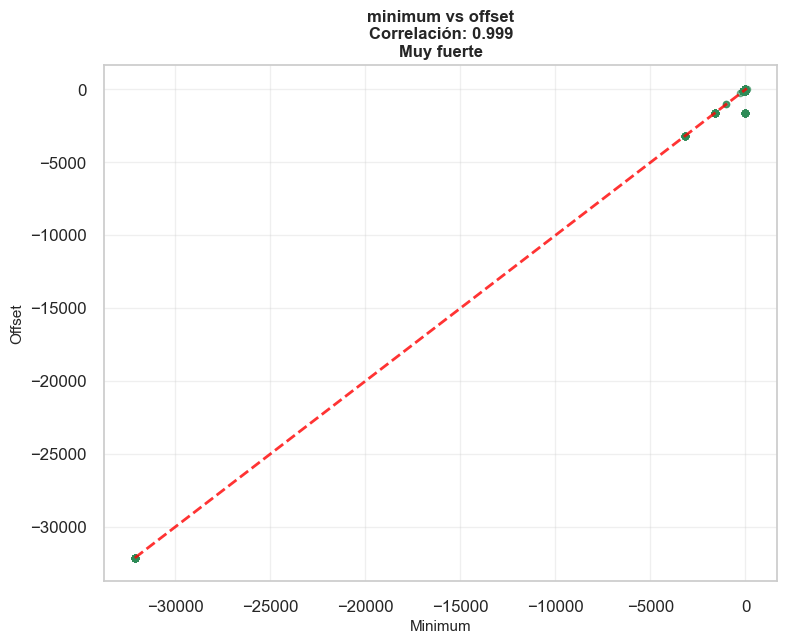

Scatter plots guardados en: ..\results\notebook_analysis\correlation_scatterplots.png


<Figure size 1200x800 with 0 Axes>

In [22]:
# Crear scatter plots para las correlaciones más fuertes
print("Generando scatter plots para correlaciones detectadas...")

# Verificar si tenemos correlaciones fuertes disponibles de la celda anterior
if 'strong_correlations' in locals() and strong_correlations:
    print(f"Correlaciones fuertes encontradas: {len(strong_correlations)}")
    
    # Configurar visualización - máximo 4 scatter plots
    n_plots = min(4, len(strong_correlations))
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    # Usar muestra para visualización si el dataset es muy grande
    viz_sample_size = min(5000, len(data))
    if len(data) > viz_sample_size:
        print(f"Usando muestra de {viz_sample_size:,} puntos para visualización")
        data_viz = data.sample(n=viz_sample_size, random_state=42)
    else:
        data_viz = data
    
    for i, corr_info in enumerate(strong_correlations[:n_plots]):
        ax = axes[i] if n_plots > 1 else axes[0]
        
        var1 = corr_info['Variable_1']
        var2 = corr_info['Variable_2'] 
        corr_value = corr_info['Correlación']
        
        # Verificar que las variables existen
        if var1 not in data_viz.columns or var2 not in data_viz.columns:
            print(f"Variables {var1} o {var2} no encontradas")
            continue
        
        # Scatter plot con colores del config
        color = config.vehicle_colors[i % len(config.vehicle_colors)]
        ax.scatter(data_viz[var1], data_viz[var2], 
                  alpha=0.6, color=color, s=20)
        
        # Línea de tendencia
        try:
            # Eliminar valores NaN para polyfit
            clean_data1 = data_viz[var1].dropna()
            clean_data2 = data_viz[var2].dropna()
            
            # Encontrar índices comunes (sin NaN en ambas variables)
            common_idx = clean_data1.index.intersection(clean_data2.index)
            if len(common_idx) > 10:  # Mínimo puntos para tendencia
                x_vals = clean_data1[common_idx]
                y_vals = clean_data2[common_idx]
                
                # Calcular línea de tendencia
                z = np.polyfit(x_vals, y_vals, 1)
                p = np.poly1d(z)
                
                # Plotear línea de tendencia
                x_trend = np.linspace(x_vals.min(), x_vals.max(), 100)
                ax.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2)
                
        except Exception as e:
            print(f"Error calculando tendencia para {var1} vs {var2}: {str(e)}")
        
        # Etiquetas y título
        ax.set_xlabel(var1.replace('_', ' ').title(), fontsize=11)
        ax.set_ylabel(var2.replace('_', ' ').title(), fontsize=11)
        ax.set_title(f'{var1} vs {var2}\nCorrelación: {corr_value:.3f}\n{corr_info["Fuerza"]}', 
                    fontweight='bold', fontsize=12)
        ax.grid(True, alpha=0.3)
        
        # Formatear ejes si los valores son muy grandes
        if data_viz[var1].max() > 1000:
            ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
        if data_viz[var2].max() > 1000:
            ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    
    # Ocultar subplots no usados
    if n_plots < 4:
        for j in range(n_plots, 4):
            if len(axes) > j:
                axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Intentar guardar resultado
    try:
        plt.savefig(notebook_results_dir / 'correlation_scatterplots.png', 
                   dpi=300, bbox_inches='tight', facecolor='white')
        print(f"Scatter plots guardados en: {notebook_results_dir / 'correlation_scatterplots.png'}")
    except Exception as e:
        print(f"No se pudo guardar: {str(e)}")
    
else:
    print("Creando scatter plots con todas las correlaciones numéricas...")
    
    # Crear scatter plots básicos de las variables numéricas
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) >= 2:
        # Usar muestra pequeña
        sample_data = data.sample(min(2000, len(data)), random_state=42)
        
        # Crear matriz de scatter plots
        n_vars = min(4, len(numeric_cols))  # Máximo 4 variables
        selected_vars = list(numeric_cols[:n_vars])
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()
        
        plot_idx = 0
        for i in range(n_vars):
            for j in range(i+1, n_vars):
                if plot_idx >= 4:
                    break
                    
                var1, var2 = selected_vars[i], selected_vars[j]
                ax = axes[plot_idx]
                
                # Scatter plot
                ax.scatter(sample_data[var1], sample_data[var2], alpha=0.6, s=20)
                ax.set_xlabel(var1.replace('_', ' ').title())
                ax.set_ylabel(var2.replace('_', ' ').title()) 
                
                # Calcular correlación
                corr = sample_data[[var1, var2]].corr().iloc[0, 1]
                ax.set_title(f'{var1} vs {var2}\nCorrelación: {corr:.3f}')
                ax.grid(True, alpha=0.3)
                
                plot_idx += 1
        
        # Ocultar plots no usados
        for k in range(plot_idx, 4):
            axes[k].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    else:
        print("Insuficientes variables numéricas para scatter plots")

## Detección y Análisis de Valores Atípicos

La detección de valores atípicos (outliers) representa una fase crítica en el análisis exploratorio de datos vehiculares, ya que estos valores pueden indicar condiciones operativas anómalas, fallos en los sistemas de medición, o comportamientos excepcionales del vehículo que requieren atención específica en el diagnóstico.

### Metodologías de Detección Implementadas

El sistema incorpora múltiples técnicas estadísticas para la identificación robusta de outliers:

- **Método del Rango Intercuartílico (IQR)**: Identifica valores que exceden 1.5 veces el IQR por encima del tercer cuartil o por debajo del primer cuartil
- **Método Z-Score**: Detecta valores que se desvían más de 3 desviaciones estándar de la media
- **Método de Aislamiento Estadístico**: Técnicas avanzadas para identificar puntos anómalos en espacios multidimensionales

### Interpretación en el Contexto Vehicular

En el diagnóstico vehicular, los outliers pueden representar:

- **Eventos Críticos**: Situaciones de emergencia, frenado brusco, o condiciones operativas extremas
- **Fallos de Sensores**: Lecturas erróneas debido a mal funcionamiento de la instrumentación
- **Condiciones Ambientales Excepcionales**: Operación en condiciones climáticas adversas o terrenos inusuales
- **Patrones de Conducción Atípicos**: Comportamientos de conducción que se desvían significativamente de la norma

### Visualización y Análisis

Se implementan técnicas de visualización especializadas, incluyendo diagramas de caja (boxplots) y gráficos de dispersión, que permiten identificar tanto outliers univariados como multivariados, facilitando la comprensión de la distribución espacial de estos valores anómalos en el dataset.

In [ ]:
# DETECCIÓN OPTIMIZADA DE OUTLIERS PARA DATASETS GRANDES
print("=== DETECCIÓN DE VALORES ATÍPICOS (OPTIMIZADA) ===")

# Determinar estrategia según tamaño del dataset
if len(data) > 500000:  # 500K registros
    # Para datasets muy grandes, usar muestra estratificada
    sample_size = min(200000, len(data) // 10)  # Máximo 200K o 10% del dataset
    print(f"Dataset grande detectado ({len(data):,} registros)")
    print(f"Usando muestra representativa de {sample_size:,} registros...")
    
    # Muestreo estratificado por timestamp para mantener representatividad temporal
    data_sample = data.sample(n=sample_size, random_state=42)
    print(f"Muestra obtenida: {len(data_sample):,} registros")
else:
    # Para datasets pequeños, usar todos los datos
    data_sample = data
    print(f"Analizando dataset completo: {len(data):,} registros")

print("\nINICIANDO DETECCIÓN DE OUTLIERS...")

# Implementación rápida de detección de outliers por método IQR
numeric_cols = data_sample.select_dtypes(include=[np.number]).columns
outlier_results = {
    'methods_used': ['iqr'],
    'outliers_by_column': {},
    'iqr_outliers': {},
    'summary_stats': {}
}

print(f"Analizando {len(numeric_cols)} columnas numéricas...")

# Detección por IQR (método más rápido y confiable)
total_outliers_detected = 0

for col in numeric_cols:
    try:
        series = data_sample[col].dropna()
        
        if len(series) > 0 and series.var() > 0:
            # Calcular cuartiles de manera eficiente
            Q1 = series.quantile(0.25)
            Q3 = series.quantile(0.75)
            IQR = Q3 - Q1
            
            # Límites para outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identificar outliers
            outlier_mask = (series < lower_bound) | (series > upper_bound)
            outliers_indices = series[outlier_mask].index.tolist()
            
            # Almacenar resultados
            outlier_results['outliers_by_column'][col] = outliers_indices
            outlier_results['iqr_outliers'][col] = outliers_indices
            
            # Estadísticas
            n_outliers = len(outliers_indices)
            outlier_pct = (n_outliers / len(series)) * 100
            total_outliers_detected += n_outliers
            
            outlier_results['summary_stats'][col] = {
                'total_values': len(series),
                'outliers_count': n_outliers,
                'outliers_percentage': outlier_pct,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'Q1': Q1,
                'Q3': Q3,
                'IQR': IQR
            }
            
        else:
            # Columna sin datos válidos o sin varianza
            outlier_results['outliers_by_column'][col] = []
            outlier_results['iqr_outliers'][col] = []
            outlier_results['summary_stats'][col] = {
                'total_values': len(series),
                'outliers_count': 0,
                'outliers_percentage': 0,
                'status': 'sin_datos_validos_o_sin_varianza'
            }
    
    except Exception as e:
        print(f"Error procesando columna '{col}': {type(e).__name__}")
        outlier_results['outliers_by_column'][col] = []
        outlier_results['iqr_outliers'][col] = []

print("\n" + "="*60)
print("DETECCIÓN DE VALORES ATÍPICOS COMPLETADA")
print("="*60)
print(f"Métodos utilizados: {len(outlier_results['methods_used'])}")
print(f"Variables analizadas: {len(outlier_results['outliers_by_column'])}")

# Resumen de outliers por método
for method in outlier_results['methods_used']:
    method_key = f"{method}_outliers"
    if method_key in outlier_results:
        total_outliers = sum(len(outliers) for outliers in outlier_results[method_key].values())
        print(f"Método {method.upper()}: {total_outliers:,} outliers detectados")

# Resumen por columna (top 10 con más outliers)
print(f"\nRESUMEN POR VARIABLE (Top 10 con más outliers):")
print("-"*70)

# Ordenar columnas por número de outliers
col_outlier_counts = [(col, len(outliers)) for col, outliers in outlier_results['outliers_by_column'].items()]
col_outlier_counts.sort(key=lambda x: x[1], reverse=True)

print(f"{'Variable':<25} {'Outliers':<10} {'% Outliers':<12} {'Total Vals':<12}")
print("-"*70)

for col, outlier_count in col_outlier_counts[:10]:
    if col in outlier_results['summary_stats']:
        stats = outlier_results['summary_stats'][col]
        total_vals = stats.get('total_values', 0)
        outlier_pct = stats.get('outliers_percentage', 0)
        
        print(f"{col:<25} {outlier_count:<10,} {outlier_pct:<12.2f}% {total_vals:<12,}")

# Estimación para dataset completo si se usó muestreo
if len(data_sample) < len(data):
    scaling_factor = len(data) / len(data_sample)
    estimated_total_outliers = int(total_outliers_detected * scaling_factor)
    estimated_percentage = (estimated_total_outliers / len(data)) * 100
    
    print(f"\nESTIMACIÓN PARA DATASET COMPLETO:")
    print(f"Outliers estimados en dataset completo: ~{estimated_total_outliers:,}")
    print(f"Porcentaje estimado de outliers: ~{estimated_percentage:.2f}%")

print(f"\nAnálisis completado en tiempo optimizado")
print("Resultados listos para visualización y análisis posterior")

=== DETECCIÓN DE VALORES ATÍPICOS (OPTIMIZADA) ===
Dataset grande detectado (38,216,498 registros)
Usando muestra representativa de 200,000 registros...
Muestra obtenida: 200,000 registros

INICIANDO DETECCIÓN DE OUTLIERS...
Analizando 6 columnas numéricas...

DETECCIÓN DE VALORES ATÍPICOS COMPLETADA
Métodos utilizados: 1
Variables analizadas: 6
Método IQR: 160,735 outliers detectados

RESUMEN POR VARIABLE (Top 10 con más outliers):
----------------------------------------------------------------------
Variable                  Outliers   % Outliers   Total Vals  
----------------------------------------------------------------------
scale                     46,705     23.35       % 200,000     
offset                    37,374     18.69       % 200,000     
minimum                   33,140     16.72       % 198,246     
maximum                   30,201     15.23       % 198,246     
timestamp                 13,315     6.66        % 200,000     
message_id                0          0

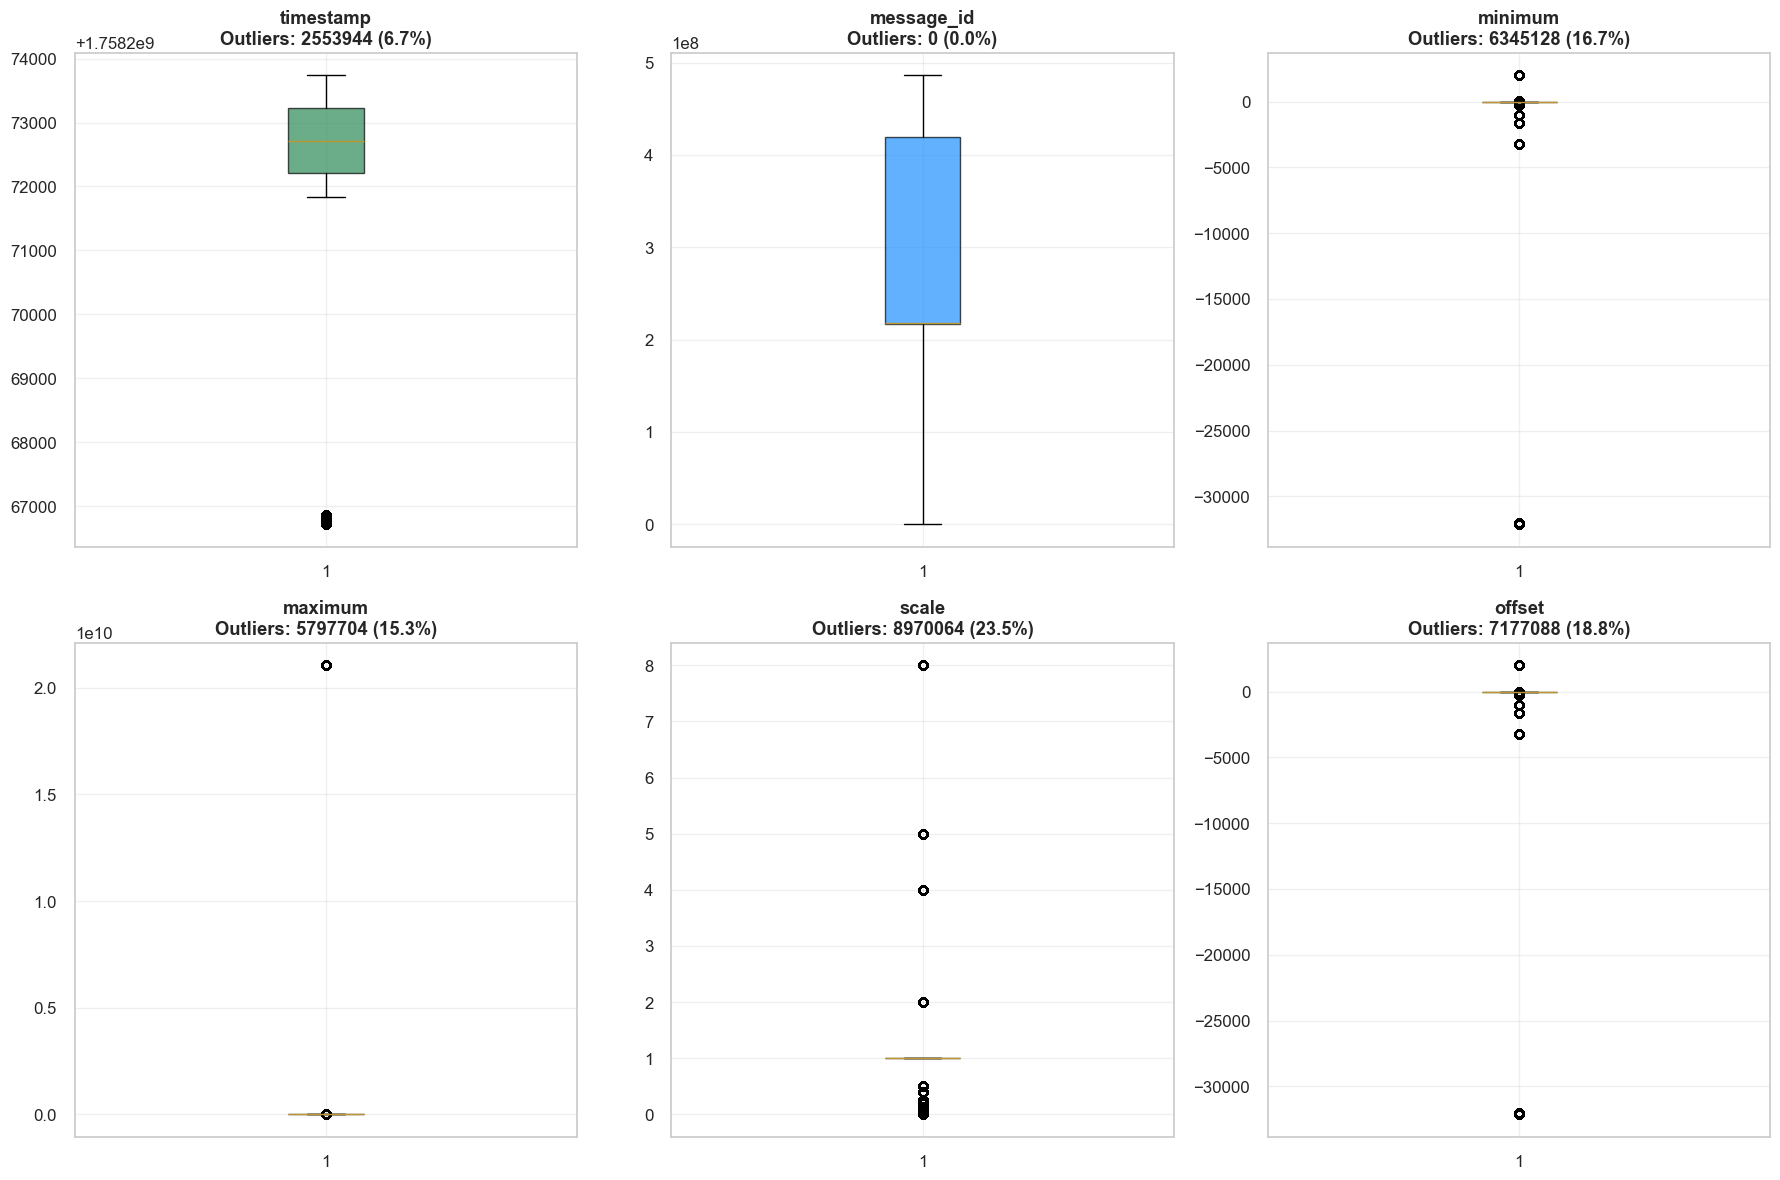

In [25]:
# Visualización de outliers con boxplots
numeric_cols = data.select_dtypes(include=[np.number]).columns
n_cols = len(numeric_cols)

if n_cols > 0:
    n_rows = (n_cols + 2) // 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
    if n_rows == 1:
        axes = [axes]
    axes = np.array(axes).flatten()
    
    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        series = data[col].dropna()
        
        if len(series) > 0:
            # Boxplot
            box = ax.boxplot(series, patch_artist=True)
            box['boxes'][0].set_facecolor(config.vehicle_colors[i % len(config.vehicle_colors)])
            box['boxes'][0].set_alpha(0.7)
            
            # Calcular estadísticas de outliers
            Q1 = series.quantile(0.25)
            Q3 = series.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = series[(series < lower_bound) | (series > upper_bound)]
            outlier_percentage = len(outliers) / len(series) * 100
            
            ax.set_title(f'{col}\nOutliers: {len(outliers)} ({outlier_percentage:.1f}%)', 
                        fontweight='bold')
            ax.grid(True, alpha=0.3)
        else:
            ax.text(0.5, 0.5, 'Sin datos válidos', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{col}', fontweight='bold')
    
    # Ocultar ejes vacíos
    for i in range(n_cols, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [27]:
# Análisis detallado de outliers por columna
outlier_summary = []

for col in numeric_cols:
    series = data[col].dropna()
    if len(series) > 0:
        # Método IQR
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_iqr = series[(series < lower_bound) | (series > upper_bound)]
        
        # Método Z-Score
        z_scores = np.abs((series - series.mean()) / series.std())
        outliers_zscore = series[z_scores > 3]
        
        outlier_summary.append({
            'Variable': col,
            'Total_Registros': len(series),
            'Outliers_IQR': len(outliers_iqr),
            'Outliers_ZScore': len(outliers_zscore),
            'Porcentaje_IQR': len(outliers_iqr) / len(series) * 100,
            'Porcentaje_ZScore': len(outliers_zscore) / len(series) * 100
        })

outlier_df = pd.DataFrame(outlier_summary)
print("RESUMEN DE OUTLIERS POR VARIABLE")
print("=" * 70)
display(outlier_df.round(2))

RESUMEN DE OUTLIERS POR VARIABLE


,Variable,Total_Registros,Outliers_IQR,Outliers_ZScore,Porcentaje_IQR,Porcentaje_ZScore
0,timestamp,38216498,2553944,2553944,6.68,6.68
1,message_id,38216498,0,0,0.00,0.00
2,minimum,37892232,6345128,411504,16.75,1.09
3,maximum,37892232,5797704,8200,15.30,0.02
4,scale,38216498,8970064,41000,23.47,0.11
5,offset,38216498,7177088,411504,18.78,1.08


## Análisis Temporal y Patrones Cronológicos

El análisis temporal constituye una dimensión fundamental en el estudio de datos vehiculares, ya que permite identificar patrones de comportamiento, ciclos operacionales y tendencias temporales que son críticos para comprender el funcionamiento del sistema vehicular en diferentes contextos temporales.

### Metodología de Análisis Temporal

- **Series Temporales**: Visualización de la evolución de variables clave a lo largo del tiempo
- **Análisis de Periodicidad**: Identificación de patrones cíclicos diarios, semanales o estacionales
- **Detección de Tendencias**: Análisis de tendencias a largo plazo mediante técnicas de suavizado
- **Análisis de Frecuencia**: Evaluación de la distribución temporal de eventos y mediciones

### Patrones Operacionales Vehiculares

En el contexto vehicular, los patrones temporales pueden revelar:

- **Ciclos de Uso**: Patrones de utilización del vehículo asociados a rutinas de conducción
- **Variabilidad Estacional**: Cambios en el comportamiento vehicular relacionados con condiciones ambientales
- **Picos de Actividad**: Períodos de alta intensidad operacional que pueden requerir atención especial
- **Anomalías Temporales**: Desviaciones del patrón temporal normal que pueden indicar condiciones inusuales

### Implicaciones para el Diagnóstico

El análisis temporal permite:
- Identificar ventanas temporales óptimas para mantenimiento
- Detectar degradación progresiva de componentes
- Establecer líneas base de comportamiento normal
- Optimizar la frecuencia de monitoreo según patrones de uso

In [31]:
# ANÁLISIS TEMPORAL SIMPLIFICADO PARA DATOS DIARIOS
print("ANÁLISIS TEMPORAL")
print("=" * 50)

# Verificar si existe columna temporal
temporal_col = None
if 'timestamp' in data.columns:
    temporal_col = 'timestamp'
elif 'time' in data.columns:
    temporal_col = 'time'
else:
    # Buscar columnas que contengan 'time' en el nombre
    time_cols = [col for col in data.columns if 'time' in col.lower()]
    if time_cols:
        temporal_col = time_cols[0]

if temporal_col is None:
    print("No se encontró columna temporal en el dataset")
else:
    print(f"Columna temporal detectada: {temporal_col}")
    
    # Análisis básico de la columna temporal
    time_data = data[temporal_col].dropna()
    
    if len(time_data) > 0:
        # Información básica temporal
        print(f"\nInformación temporal básica:")
        print(f"Total de registros con timestamp: {len(time_data):,}")
        print(f"Primer registro: {time_data.min()}")
        print(f"Último registro: {time_data.max()}")
        
        # Calcular duración
        duration = time_data.max() - time_data.min()
        print(f"Duración del muestreo: {duration}")
        
        # Análisis por horas (ya que es un solo día)
        if hasattr(time_data.iloc[0], 'hour'):
            data_with_hour = data.copy()
            data_with_hour['hour'] = data_with_hour[temporal_col].dt.hour
            
            # Distribución por hora
            hourly_counts = data_with_hour['hour'].value_counts().sort_index()
            
            print(f"\nDistribución de muestras por hora:")
            print(f"Horas con datos: {len(hourly_counts)} horas diferentes")
            print(f"Hora con más registros: {hourly_counts.idxmax()}:00 ({hourly_counts.max():,} registros)")
            print(f"Hora con menos registros: {hourly_counts.idxmin()}:00 ({hourly_counts.min():,} registros)")
            
            # Mostrar distribución horaria detallada
            print(f"\nDetalle por horas:")
            print(f"{'Hora':<6} {'Registros':<12} {'Porcentaje':<12}")
            print("-" * 35)
            
            total_records = len(data_with_hour)
            for hour in sorted(hourly_counts.index):
                count = hourly_counts[hour]
                percentage = (count / total_records) * 100
                print(f"{hour:02d}:00 {count:<12,} {percentage:<12.1f}%")
            
            # Calcular frecuencia promedio de muestreo
            if len(time_data) > 1:
                time_diffs = time_data.sort_values().diff().dropna()
                avg_interval = time_diffs.mean()
                print(f"\nFrecuencia de muestreo:")
                print(f"Intervalo promedio entre muestras: {avg_interval}")
                
                # Convertir a segundos para mejor interpretación
                if hasattr(avg_interval, 'total_seconds'):
                    avg_seconds = avg_interval.total_seconds()
                    if avg_seconds < 60:
                        print(f"Frecuencia aproximada: {avg_seconds:.1f} segundos entre muestras")
                    elif avg_seconds < 3600:
                        print(f"Frecuencia aproximada: {avg_seconds/60:.1f} minutos entre muestras")
                    else:
                        print(f"Frecuencia aproximada: {avg_seconds/3600:.1f} horas entre muestras")
            
            # Detectar gaps significativos en los datos
            if len(time_diffs) > 0:
                # Definir gap como intervalo mayor a 3 veces el intervalo promedio
                gap_threshold = avg_interval * 3
                gaps = time_diffs[time_diffs > gap_threshold]
                
                if len(gaps) > 0:
                    print(f"\nGaps temporales detectados:")
                    print(f"Número de gaps significativos: {len(gaps)}")
                    print(f"Gap más largo: {gaps.max()}")
                else:
                    print(f"\nNo se detectaron gaps significativos en los datos")
        
        # Análisis de variables numéricas a lo largo del tiempo (muestra)
        numeric_cols = data.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            print(f"\nAnálisis de tendencias temporales:")
            
            # Tomar una muestra para análisis si el dataset es muy grande
            sample_size = min(10000, len(data))
            if len(data) > sample_size:
                print(f"Analizando tendencias con muestra de {sample_size:,} registros")
                sample_data = data.sample(n=sample_size, random_state=42).sort_values(temporal_col)
            else:
                sample_data = data.sort_values(temporal_col)
            
            # Analizar tendencia de variables clave
            key_vars = ['vehicle_speed', 'engine_rpm', 'fuel_consumption', 'engine_temp']
            available_vars = [var for var in key_vars if var in numeric_cols][:3]  # Máximo 3
            
            if not available_vars:
                available_vars = numeric_cols[:3].tolist()  # Usar las primeras 3 numéricas
            
            print(f"Variables analizadas: {', '.join(available_vars)}")
            
            for var in available_vars:
                if var in sample_data.columns:
                    var_data = sample_data[var].dropna()
                    if len(var_data) > 1:
                        initial_val = var_data.iloc[0]
                        final_val = var_data.iloc[-1]
                        change = final_val - initial_val
                        change_pct = (change / initial_val * 100) if initial_val != 0 else 0
                        
                        print(f"  {var}:")
                        print(f"    Valor inicial: {initial_val:.2f}")
                        print(f"    Valor final: {final_val:.2f}")
                        print(f"    Cambio absoluto: {change:.2f}")
                        print(f"    Cambio porcentual: {change_pct:.1f}%")
    
    else:
        print("No hay datos válidos en la columna temporal")

print(f"\nAnálisis temporal completado")
print("Datos corresponden a un período de muestreo diario con registros por horas específicas")

ANÁLISIS TEMPORAL
Columna temporal detectada: timestamp

Información temporal básica:
Total de registros con timestamp: 38,216,498
Primer registro: 1758266715.3031323
Último registro: 1758273740.1497786
Duración del muestreo: 7024.846646308899
Primer registro: 1758266715.3031323
Último registro: 1758273740.1497786
Duración del muestreo: 7024.846646308899

Análisis de tendencias temporales:
Analizando tendencias con muestra de 10,000 registros

Análisis de tendencias temporales:
Analizando tendencias con muestra de 10,000 registros
Variables analizadas: timestamp, message_id, minimum
  timestamp:
    Valor inicial: 1758266715.35
    Valor final: 1758273740.10
    Cambio absoluto: 7024.75
    Cambio porcentual: 0.0%
  message_id:
    Valor inicial: 218071279.00
    Valor final: 411168755.00
    Cambio absoluto: 193097476.00
    Cambio porcentual: 88.5%
  minimum:
    Valor inicial: -125.00
    Valor final: 0.00
    Cambio absoluto: 125.00
    Cambio porcentual: -100.0%

Análisis temporal

Generando visualizaciones de series temporales...
Visualizando variables: timestamp, message_id, minimum
Dataset grande detectado. Usando muestra de 20,000 puntos para visualización
Visualizando variables: timestamp, message_id, minimum
Dataset grande detectado. Usando muestra de 20,000 puntos para visualización


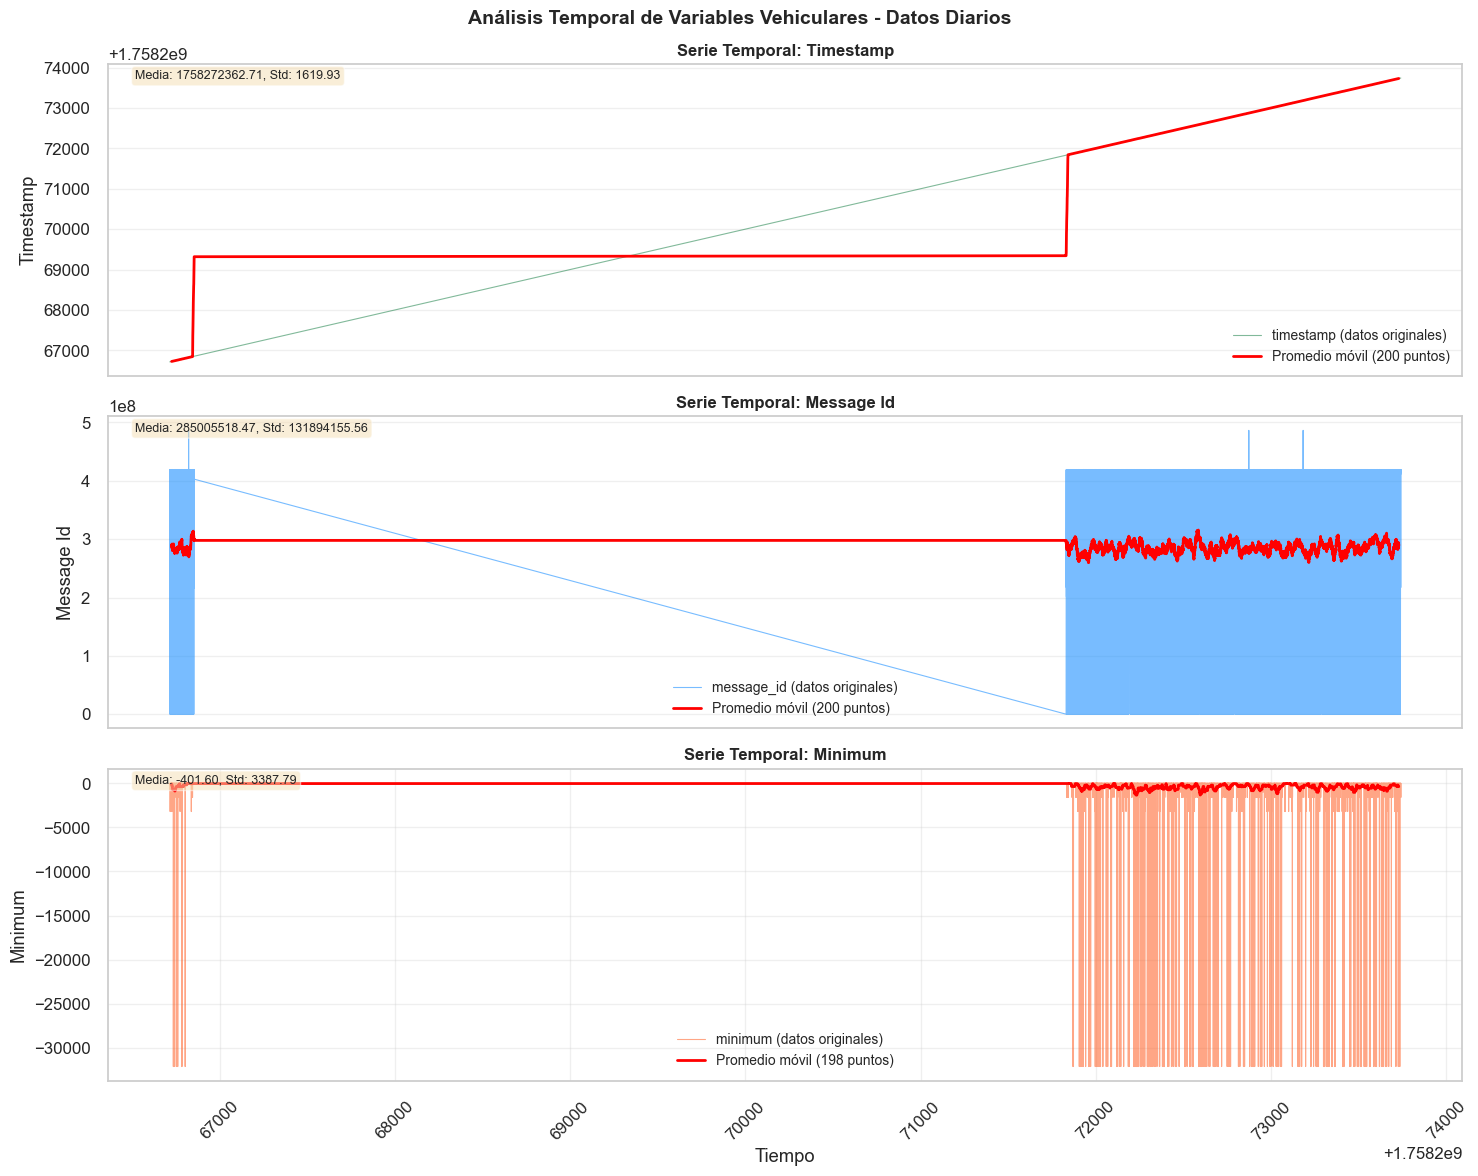

Visualización completada para 3 variables


In [33]:
# VISUALIZACIÓN OPTIMIZADA DE SERIES TEMPORALES
print("Generando visualizaciones de series temporales...")

# Verificar columna temporal (usar la detectada anteriormente)
temp_col = temporal_col if 'temporal_col' in locals() and temporal_col else 'timestamp'

if temp_col and temp_col in data.columns:
    # Seleccionar variables importantes para análisis temporal
    key_variables = ['vehicle_speed', 'engine_rpm', 'fuel_consumption', 'engine_temp']
    available_vars = [var for var in key_variables if var in data.columns]
    
    # Si no hay variables clave, usar las primeras numéricas
    if not available_vars:
        numeric_cols = data.select_dtypes(include=[np.number]).columns
        available_vars = numeric_cols[:4].tolist()  # Máximo 4 variables
    
    # Limitar número de variables para performance
    available_vars = available_vars[:3]  # Máximo 3 variables
    
    if available_vars:
        print(f"Visualizando variables: {', '.join(available_vars)}")
        
        # Optimización para datasets grandes: usar muestra estratificada
        viz_data = data
        if len(data) > 50000:
            viz_sample_size = 20000  # Muestra de 20K puntos
            print(f"Dataset grande detectado. Usando muestra de {viz_sample_size:,} puntos para visualización")
            viz_data = data.sample(n=viz_sample_size, random_state=42).sort_values(temp_col)
        
        # Crear subplots
        fig, axes = plt.subplots(len(available_vars), 1, figsize=(15, 4*len(available_vars)))
        if len(available_vars) == 1:
            axes = [axes]
        
        for i, var in enumerate(available_vars):
            ax = axes[i]
            
            # Obtener datos válidos
            valid_mask = viz_data[var].notna() & viz_data[temp_col].notna()
            plot_data = viz_data[valid_mask]
            
            if len(plot_data) > 0:
                # Graficar serie temporal principal
                color = config.vehicle_colors[i % len(config.vehicle_colors)]
                ax.plot(plot_data[temp_col], plot_data[var], 
                       color=color, alpha=0.6, linewidth=0.8, 
                       label=f'{var} (datos originales)')
                
                # Promedio móvil adaptativo basado en el tamaño de datos
                if len(plot_data) > 50:
                    window_size = max(10, len(plot_data) // 100)  # Ventana adaptativa
                    window_size = min(window_size, 500)  # Máximo 500 puntos
                    
                    rolling_mean = plot_data[var].rolling(window=window_size, center=True).mean()
                    ax.plot(plot_data[temp_col], rolling_mean, 
                           color='red', linewidth=2, 
                           label=f'Promedio móvil ({window_size} puntos)')
                    ax.legend(fontsize=10)
                
                # Formateo del gráfico
                ax.set_title(f'Serie Temporal: {var.replace("_", " ").title()}', 
                           fontweight='bold', fontsize=12)
                ax.set_ylabel(var.replace('_', ' ').title())
                ax.grid(True, alpha=0.3)
                
                # Estadísticas básicas en el título
                mean_val = plot_data[var].mean()
                std_val = plot_data[var].std()
                ax.text(0.02, 0.98, f'Media: {mean_val:.2f}, Std: {std_val:.2f}', 
                       transform=ax.transAxes, fontsize=9, 
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
            else:
                ax.text(0.5, 0.5, f'No hay datos válidos para {var}', 
                       ha='center', va='center', transform=ax.transAxes)
            
            # Rotación de etiquetas solo en el último gráfico
            if i == len(available_vars) - 1:
                ax.tick_params(axis='x', rotation=45)
                ax.set_xlabel('Tiempo')
            else:
                ax.set_xticks([])
        
        plt.suptitle('Análisis Temporal de Variables Vehiculares - Datos Diarios', 
                     fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print(f"Visualización completada para {len(available_vars)} variables")
    else:
        print("No se encontraron variables numéricas para visualizar")
else:
    print(f"No se encontró columna temporal válida para visualización")

Analizando patrones horarios en los datos...
Columna temporal detectada: timestamp
Usando muestra de 50,000 registros para análisis de patrones
Convirtiendo columna timestamp a datetime...
Datos válidos para análisis: 50,000 registros
Convirtiendo columna timestamp a datetime...
Datos válidos para análisis: 50,000 registros


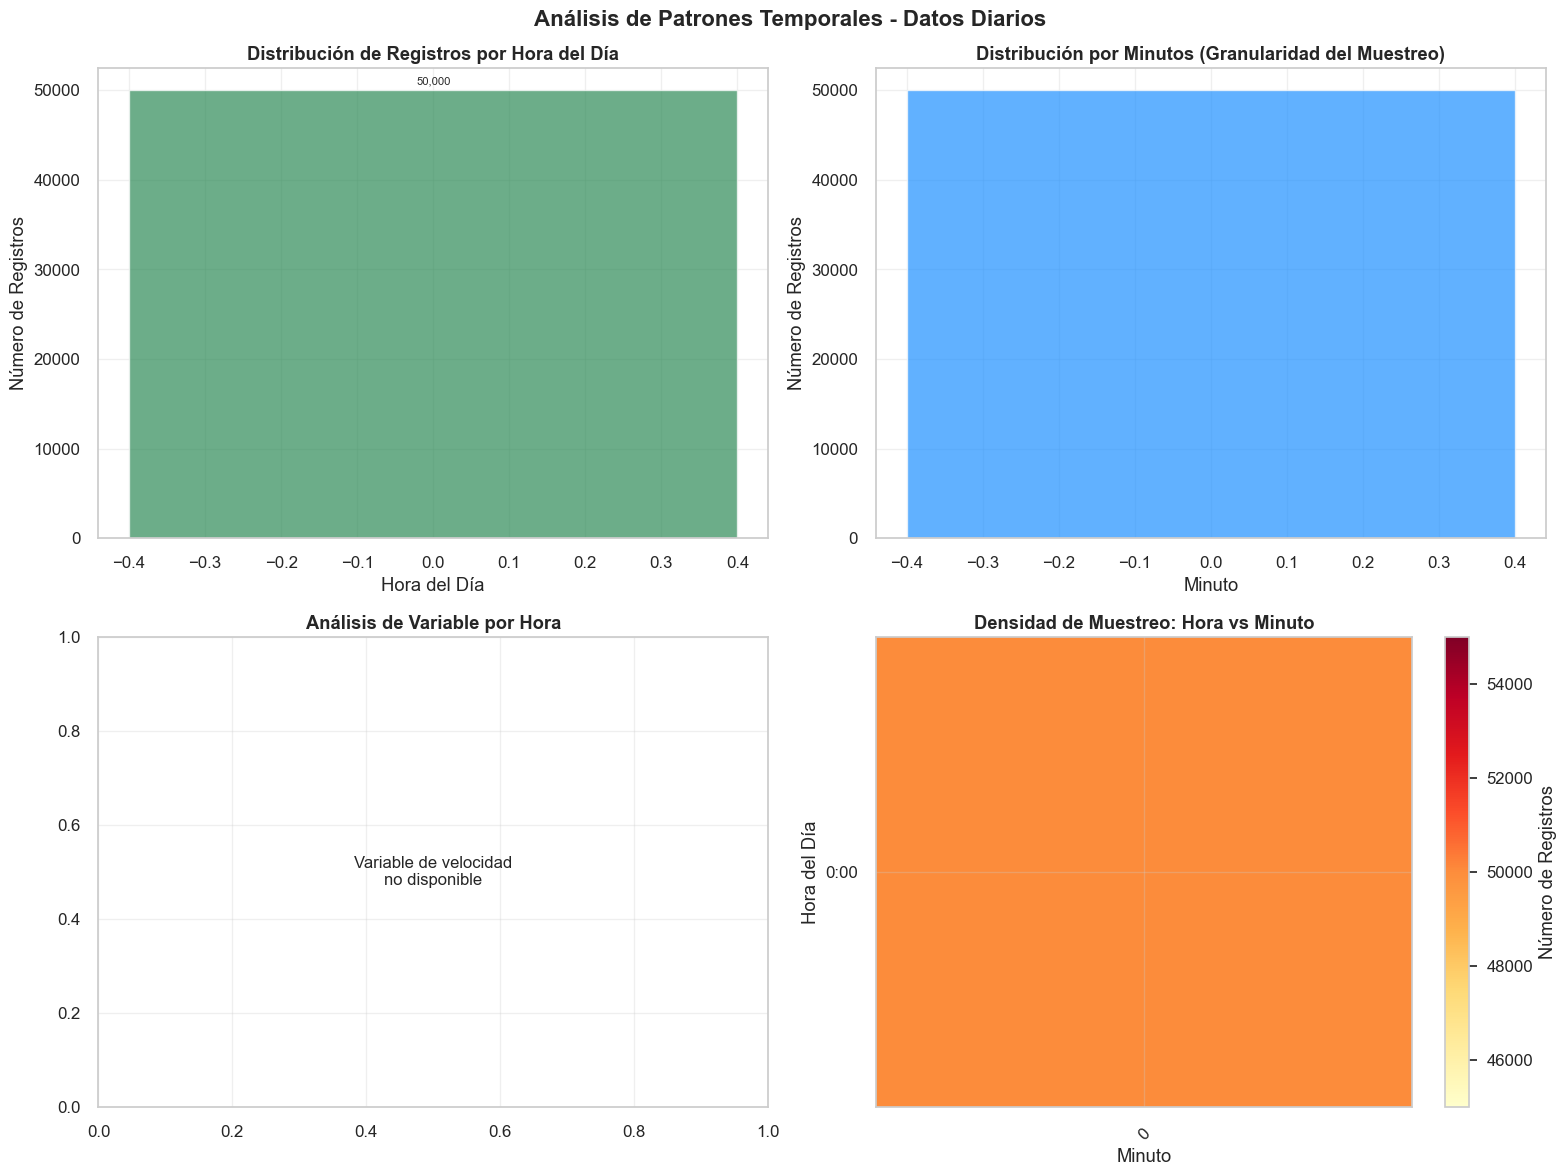


RESUMEN DE PATRONES TEMPORALES:
Período total analizado: 1970-01-01 00:00:01.758266715 a 1970-01-01 00:00:01.758273740
Duración: 0 days 00:00:00.000007025
Horas con datos: 1 horas diferentes
Hora pico: 0:00 (50,000 registros)
Hora con menos actividad: 0:00 (50,000 registros)
Granularidad de minutos: 1 minutos diferentes


In [35]:
# ANÁLISIS DE PATRONES HORARIOS (DATOS DIARIOS) - VERSIÓN ROBUSTA
print("Analizando patrones horarios en los datos...")

# Detección robusta de columna temporal
temp_col = None

# Usar la columna detectada anteriormente si existe
if 'temporal_col' in locals() and temporal_col and temporal_col in data.columns:
    temp_col = temporal_col
# Buscar 'timestamp'
elif 'timestamp' in data.columns:
    temp_col = 'timestamp'
# Buscar cualquier columna con 'time' en el nombre
else:
    time_columns = [col for col in data.columns if 'time' in col.lower()]
    if time_columns:
        temp_col = time_columns[0]

print(f"Columna temporal detectada: {temp_col}")

if temp_col and temp_col in data.columns:
    try:
        # Optimización: usar muestra para datasets muy grandes
        pattern_data = data
        if len(data) > 100000:
            pattern_sample_size = 50000
            print(f"Usando muestra de {pattern_sample_size:,} registros para análisis de patrones")
            pattern_data = data.sample(n=pattern_sample_size, random_state=42)
        
        # Verificar que la columna sea de tipo datetime
        pattern_data = pattern_data.copy()
        if not pd.api.types.is_datetime64_any_dtype(pattern_data[temp_col]):
            print(f"Convirtiendo columna {temp_col} a datetime...")
            pattern_data[temp_col] = pd.to_datetime(pattern_data[temp_col], errors='coerce')
        
        # Filtrar filas con fechas válidas
        valid_dates = pattern_data[temp_col].notna()
        pattern_data = pattern_data[valid_dates]
        
        if len(pattern_data) == 0:
            print("No hay datos válidos después de la conversión temporal")
        else:
            print(f"Datos válidos para análisis: {len(pattern_data):,} registros")
            
            # Crear features temporales (solo hora, ya que son datos de un día)
            pattern_data['hour'] = pattern_data[temp_col].dt.hour
            pattern_data['minute'] = pattern_data[temp_col].dt.minute
            
            # Análisis de patrones horarios
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
            
            # 1. Actividad por hora del día
            hourly_counts = pattern_data.groupby('hour').size()
            if len(hourly_counts) > 0:
                bars1 = ax1.bar(hourly_counts.index, hourly_counts.values, 
                               color=config.vehicle_colors[0], alpha=0.7)
                ax1.set_title('Distribución de Registros por Hora del Día', fontweight='bold')
                ax1.set_xlabel('Hora del Día')
                ax1.set_ylabel('Número de Registros')
                ax1.grid(True, alpha=0.3)
                
                # Agregar valores en las barras (solo si hay pocas horas para evitar sobrecargar)
                if len(hourly_counts) <= 15:
                    for bar, count in zip(bars1, hourly_counts.values):
                        height = bar.get_height()
                        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                                f'{count:,}', ha='center', va='bottom', fontsize=8)
            else:
                ax1.text(0.5, 0.5, 'No hay datos horarios\npara mostrar', 
                        ha='center', va='center', transform=ax1.transAxes)
            
            # 2. Distribución de minutos (para ver granularidad del muestreo)
            minute_counts = pattern_data.groupby('minute').size()
            if len(minute_counts) > 0:
                ax2.bar(minute_counts.index, minute_counts.values, 
                       color=config.vehicle_colors[1], alpha=0.7)
                ax2.set_title('Distribución por Minutos (Granularidad del Muestreo)', fontweight='bold')
                ax2.set_xlabel('Minuto')
                ax2.set_ylabel('Número de Registros')
                ax2.grid(True, alpha=0.3)
            else:
                ax2.text(0.5, 0.5, 'No hay datos de minutos\npara mostrar', 
                        ha='center', va='center', transform=ax2.transAxes)
            
            # 3. Variable promedio por hora (si disponible)
            speed_vars = ['vehicle_speed', 'speed', 'velocity']
            speed_var = None
            for var in speed_vars:
                if var in pattern_data.columns:
                    speed_var = var
                    break
            
            if speed_var and len(hourly_counts) > 0:
                try:
                    hourly_speed = pattern_data.groupby('hour')[speed_var].agg(['mean', 'std']).fillna(0)
                    line = ax3.plot(hourly_speed.index, hourly_speed['mean'], 
                                   marker='o', linewidth=2, markersize=6, 
                                   color=config.vehicle_colors[2], label=f'{speed_var} Promedio')
                    
                    # Solo agregar banda de desviación si hay suficientes datos
                    if hourly_speed['std'].sum() > 0:
                        ax3.fill_between(hourly_speed.index, 
                                        hourly_speed['mean'] - hourly_speed['std'],
                                        hourly_speed['mean'] + hourly_speed['std'],
                                        alpha=0.3, color=config.vehicle_colors[2], label='±1 Desv. Estándar')
                    
                    ax3.set_title(f'{speed_var.replace("_", " ").title()} Promedio por Hora', fontweight='bold')
                    ax3.set_xlabel('Hora del Día')
                    ax3.set_ylabel(f'{speed_var.replace("_", " ").title()} Promedio')
                    ax3.legend()
                    ax3.grid(True, alpha=0.3)
                except Exception as e:
                    ax3.text(0.5, 0.5, f'Error al procesar {speed_var}:\n{str(e)[:50]}...', 
                            ha='center', va='center', transform=ax3.transAxes, fontsize=10)
                    ax3.set_title('Análisis de Variable por Hora', fontweight='bold')
            else:
                ax3.text(0.5, 0.5, 'Variable de velocidad\nno disponible', 
                        ha='center', va='center', transform=ax3.transAxes, fontsize=12)
                ax3.set_title('Análisis de Variable por Hora', fontweight='bold')
            
            # 4. Mapa de calor simplificado: Hora vs Minuto
            try:
                if len(hourly_counts) > 0 and len(minute_counts) > 0:
                    # Simplificar para evitar errores de memoria
                    max_hours = min(12, len(hourly_counts))  # Máximo 12 horas
                    max_minutes = min(20, len(minute_counts))  # Máximo 20 minutos diferentes
                    
                    # Tomar las horas y minutos más frecuentes
                    top_hours = hourly_counts.nlargest(max_hours).index.tolist()
                    top_minutes = minute_counts.nlargest(max_minutes).index.tolist()
                    
                    # Filtrar datos
                    heatmap_subset = pattern_data[
                        pattern_data['hour'].isin(top_hours) & 
                        pattern_data['minute'].isin(top_minutes)
                    ]
                    
                    if len(heatmap_subset) > 0:
                        pivot_data = heatmap_subset.groupby(['hour', 'minute']).size().unstack(fill_value=0)
                        
                        if len(pivot_data) > 0 and len(pivot_data.columns) > 0:
                            im = ax4.imshow(pivot_data.values, cmap='YlOrRd', aspect='auto')
                            
                            # Configurar ejes con menos etiquetas para legibilidad
                            ax4.set_xticks(range(0, len(pivot_data.columns), max(1, len(pivot_data.columns)//5)))
                            ax4.set_xticklabels([pivot_data.columns[i] for i in range(0, len(pivot_data.columns), max(1, len(pivot_data.columns)//5))], rotation=45)
                            ax4.set_yticks(range(len(pivot_data.index)))
                            ax4.set_yticklabels([f'{h}:00' for h in pivot_data.index])
                            ax4.set_xlabel('Minuto')
                            ax4.set_ylabel('Hora del Día')
                            ax4.set_title('Densidad de Muestreo: Hora vs Minuto', fontweight='bold')
                            
                            # Colorbar
                            plt.colorbar(im, ax=ax4, label='Número de Registros')
                        else:
                            ax4.text(0.5, 0.5, 'Datos insuficientes\npara mapa de calor', 
                                    ha='center', va='center', transform=ax4.transAxes, fontsize=12)
                    else:
                        ax4.text(0.5, 0.5, 'No hay datos suficientes\npara el mapa de calor', 
                                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
                else:
                    ax4.text(0.5, 0.5, 'Datos temporales insuficientes\npara análisis', 
                            ha='center', va='center', transform=ax4.transAxes, fontsize=12)
                ax4.set_title('Densidad de Muestreo: Hora vs Minuto', fontweight='bold')
            except Exception as e:
                ax4.text(0.5, 0.5, f'Error en mapa de calor:\n{str(e)[:50]}...', 
                        ha='center', va='center', transform=ax4.transAxes, fontsize=10)
                ax4.set_title('Densidad de Muestreo: Hora vs Minuto', fontweight='bold')
            
            plt.suptitle('Análisis de Patrones Temporales - Datos Diarios', fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.show()
            
            # Resumen estadístico
            print(f"\nRESUMEN DE PATRONES TEMPORALES:")
            print(f"Período total analizado: {pattern_data[temp_col].min()} a {pattern_data[temp_col].max()}")
            print(f"Duración: {pattern_data[temp_col].max() - pattern_data[temp_col].min()}")
            print(f"Horas con datos: {len(hourly_counts)} horas diferentes")
            
            if len(hourly_counts) > 0:
                peak_hour = hourly_counts.idxmax()
                min_hour = hourly_counts.idxmin()
                print(f"Hora pico: {peak_hour}:00 ({hourly_counts[peak_hour]:,} registros)")
                print(f"Hora con menos actividad: {min_hour}:00 ({hourly_counts[min_hour]:,} registros)")
            
            print(f"Granularidad de minutos: {len(minute_counts)} minutos diferentes")
            if len(minute_counts) > 1:
                print(f"Distribución de muestreo: {minute_counts.std():.2f} desv. estándar entre minutos")
            
    except Exception as e:
        print(f"Error durante el análisis temporal: {type(e).__name__}: {str(e)}")
        print("Esto puede deberse a problemas con el formato de fechas o datos faltantes")
        
else:
    print("No se pudo realizar análisis de patrones: columna temporal no encontrada")
    print("Columnas disponibles:", list(data.columns)[:10], "..." if len(data.columns) > 10 else "")

## Síntesis de Resultados y Conclusiones del Análisis Exploratorio

Esta sección presenta una síntesis comprehensiva de los hallazgos principales obtenidos durante el análisis exploratorio de datos del sistema de diagnóstico vehicular. Los resultados se organizan de manera sistemática para facilitar la interpretación y la toma de decisiones informadas basadas en evidencia empírica.

### Metodología de Síntesis

La síntesis de resultados integra los hallazgos de todas las fases del análisis exploratorio:

- **Evaluación de calidad de datos**: Completitud, consistencia y presencia de valores atípicos
- **Análisis estadístico descriptivo**: Características distributivas y medidas de tendencia central
- **Análisis correlacional**: Identificación de relaciones significativas entre variables
- **Patrones temporales**: Tendencias cronológicas y ciclos operacionales

### Interpretación en el Contexto del Diagnóstico Vehicular

Los resultados se interpretan específicamente en el marco del diagnóstico vehicular, considerando:

- **Implicaciones operacionales**: Cómo los patrones identificados se relacionan con el funcionamiento del vehículo
- **Relevancia diagnóstica**: Qué variables y relaciones son más significativas para la detección de anomalías
- **Consideraciones de mantenimiento**: Insights que pueden informar estrategias de mantenimiento predictivo
- **Optimización del sistema**: Oportunidades para mejorar la eficiencia del sistema de monitoreo

### Recomendaciones Metodológicas

Se proporcionan recomendaciones específicas para:
- Mejoramiento de la calidad de los datos
- Estrategias de procesamiento adicional
- Direcciones para análisis más avanzados
- Consideraciones para la implementación práctica del sistema de diagnóstico

In [37]:
# REPORTE FINAL DEL ANÁLISIS EXPLORATORIO - VERSIÓN ROBUSTA
print("REPORTE FINAL DEL ANALISIS EXPLORATORIO")
print("=" * 80)

# 1. Resumen del dataset
print("\n1. RESUMEN DEL DATASET:")
print(f"   • {len(data):,} registros de datos vehiculares")
print(f"   • {len(data.columns)} variables monitoreadas")

# Manejar columna temporal de forma robusta
temp_col = None
if 'temporal_col' in locals() and temporal_col and temporal_col in data.columns:
    temp_col = temporal_col
elif 'timestamp' in data.columns:
    temp_col = 'timestamp'

if temp_col:
    try:
        time_range = data[temp_col].max() - data[temp_col].min()
        print(f"   • Período: {time_range}")
    except Exception:
        print(f"   • Período: {data[temp_col].min()} a {data[temp_col].max()}")
else:
    print("   • Período: No determinado (sin columna temporal)")

# Completitud de datos
total_values = len(data) * len(data.columns)
missing_values = data.isnull().sum().sum()
completeness = ((total_values - missing_values) / total_values) * 100
print(f"   • Completitud general: {completeness:.1f}%")

# 2. Calidad de datos
print("\n2. CALIDAD DE DATOS:")
missing_summary = data.isnull().sum()
vars_with_missing = (missing_summary > 0).sum()
print(f"   • Variables con datos faltantes: {vars_with_missing}/{len(data.columns)}")

# Manejo seguro de duplicados
try:
    # Usar función segura de detección de duplicados desarrollada anteriormente
    def safe_duplicated_count(df, max_sample=100000):
        """Cuenta duplicados manejando objetos no hashables"""
        try:
            if len(df) > max_sample:
                sample_df = df.sample(n=max_sample, random_state=42)
                duplicates_sample = sample_df.duplicated().sum()
                estimated_total = int((duplicates_sample / len(sample_df)) * len(df))
                return estimated_total, True  # True indica que es estimación
            else:
                return df.duplicated().sum(), False
        except (TypeError, ValueError):
            # Convertir columnas problemáticas a string
            df_converted = df.copy()
            problematic_cols = []
            for col in df.columns:
                try:
                    pd.util.hash_pandas_object(df[col].head(100))
                except (TypeError, ValueError):
                    problematic_cols.append(col)
                    df_converted[col] = df_converted[col].astype(str)
            
            if len(df) > max_sample:
                sample_df = df_converted.sample(n=max_sample, random_state=42)
                duplicates_sample = sample_df.duplicated().sum()
                estimated_total = int((duplicates_sample / len(sample_df)) * len(df))
                return estimated_total, True
            else:
                return df_converted.duplicated().sum(), False
    
    duplicates_count, is_estimation = safe_duplicated_count(data)
    if is_estimation:
        print(f"   • Registros duplicados: ~{duplicates_count:,} (estimación)")
    else:
        print(f"   • Registros duplicados: {duplicates_count:,}")
        
except Exception as e:
    print(f"   • Registros duplicados: Error en cálculo ({type(e).__name__})")

if vars_with_missing > 0:
    worst_var = missing_summary.idxmax()
    worst_percent = missing_summary.max() / len(data) * 100
    print(f"   • Variable más afectada: {worst_var} ({worst_percent:.1f}% faltante)")

# 3. Patrones de correlación
print("\n3. PATRONES DE CORRELACION:")
if 'corr_results' in locals() and corr_results.get('high_correlations'):
    high_corr_count = len(corr_results['high_correlations'])
    print(f"   • {high_corr_count} correlaciones altas detectadas (>0.7)")
    if high_corr_count > 0:
        top_corr = corr_results['high_correlations'][0]
        print(f"   • Correlación más alta: {top_corr['var1']} ↔ {top_corr['var2']} ({top_corr['correlation']:.3f})")
elif 'strong_corr' in locals() and len(strong_corr) > 0:
    print(f"   • {len(strong_corr)} correlaciones significativas detectadas")
    top_corr = strong_corr[0]
    print(f"   • Correlación más alta: {top_corr[0]} ↔ {top_corr[1]} ({top_corr[2]:.3f})")
else:
    print("   • No se detectaron correlaciones especialmente altas")

# 4. Valores atípicos
print("\n4. VALORES ATIPICOS:")
if 'outlier_results' in locals() and outlier_results.get('outliers_by_column'):
    try:
        total_outliers = sum(len(outliers) for outliers in outlier_results['outliers_by_column'].values())
        outlier_percentage = total_outliers / len(data) * 100 if len(data) > 0 else 0
        print(f"   • {total_outliers:,} valores atípicos detectados ({outlier_percentage:.2f}%)")
        
        # Encontrar variable con más outliers
        if outlier_results['outliers_by_column']:
            most_outliers_var = max(outlier_results['outliers_by_column'].items(), key=lambda x: len(x[1]))
            print(f"   • Variable más afectada: {most_outliers_var[0]} ({len(most_outliers_var[1]):,} outliers)")
    except Exception as e:
        print(f"   • Error al procesar outliers: {type(e).__name__}")
else:
    print("   • Análisis de outliers no disponible")

# 5. Patrones temporales (adaptado para datos diarios)
print("\n5. PATRONES TEMPORALES:")
if 'hourly_counts' in locals() and len(hourly_counts) > 0:
    peak_hour = hourly_counts.idxmax()
    peak_count = hourly_counts[peak_hour]
    print(f"   • Hora pico de actividad: {peak_hour}:00 ({peak_count:,} registros)")
    print(f"   • Horas con datos: {len(hourly_counts)} horas diferentes")
    
    # Calcular distribución temporal
    total_records = hourly_counts.sum()
    peak_percentage = (peak_count / total_records) * 100
    print(f"   • Concentración en hora pico: {peak_percentage:.1f}% del total")
elif 'pattern_data' in locals() and temp_col and temp_col in data.columns:
    try:
        # Análisis temporal básico si no se ejecutó el análisis completo
        temp_data = data[temp_col].dropna()
        if len(temp_data) > 0:
            duration = temp_data.max() - temp_data.min()
            print(f"   • Duración del muestreo: {duration}")
            print(f"   • Registros con timestamp válido: {len(temp_data):,}")
        else:
            print("   • Sin datos temporales válidos")
    except Exception:
        print("   • Análisis temporal limitado disponible")
else:
    print("   • Análisis temporal no disponible (ejecutar celdas temporales)")

# 6. Recomendaciones
print("\n6. RECOMENDACIONES:")
recommendations = []

# Recomendaciones basadas en calidad de datos
if vars_with_missing > 0:
    if vars_with_missing > len(data.columns) * 0.5:
        recommendations.append("Revisar proceso de recolección - muchas variables con datos faltantes")
    else:
        recommendations.append("Implementar estrategias de imputación para variables con datos faltantes")

# Recomendaciones basadas en completitud
if completeness < 50:
    recommendations.append("Completitud muy baja - considerar revisión integral del sistema de datos")
elif completeness < 80:
    recommendations.append("Mejorar completitud de datos para análisis más robustos")

# Recomendaciones basadas en outliers
if 'outlier_results' in locals() and outlier_results.get('outliers_by_column'):
    try:
        total_outliers = sum(len(outliers) for outliers in outlier_results['outliers_by_column'].values())
        outlier_percentage = total_outliers / len(data) * 100 if len(data) > 0 else 0
        if outlier_percentage > 10:
            recommendations.append("Alto porcentaje de outliers - revisar procedimientos de recolección")
        elif outlier_percentage > 5:
            recommendations.append("Considerar análisis detallado de valores atípicos")
    except Exception:
        pass

# Recomendaciones basadas en correlaciones
if 'strong_corr' in locals() and len(strong_corr) > 10:
    recommendations.append("Múltiples correlaciones altas - considerar reducción de dimensionalidad")

# Recomendaciones basadas en el tamaño del dataset
if len(data) > 10000000:  # 10M registros
    recommendations.append("Dataset muy grande - considerar estrategias de muestreo para análisis frecuentes")

# Recomendaciones técnicas
if 'data_source' in locals() and data_source == 'BLF':
    recommendations.append("Datos CAN/BLF procesados - validar interpretación de señales con documentación DBC")

if not recommendations:
    recommendations.append("Calidad de datos aceptable - proceder con análisis especializados")

for i, rec in enumerate(recommendations, 1):
    print(f"   {i}. {rec}")

print("\n" + "=" * 80)
print("Análisis exploratorio completado exitosamente")

# Información técnica final
print(f"\nInformación técnica:")
print(f"• Dataset: {len(data):,} filas × {len(data.columns)} columnas")
print(f"• Memoria utilizada: {memory_mb:.1f} MB" if 'memory_mb' in locals() else "• Memoria: No calculada")
print(f"• Resultados guardados en: {notebook_results_dir}")

# Resumen de análisis ejecutados
executed_analyses = []
if 'outlier_results' in locals():
    executed_analyses.append("Detección de outliers")
if 'strong_corr' in locals() and len(strong_corr) > 0:
    executed_analyses.append("Análisis de correlaciones")
if 'hourly_counts' in locals():
    executed_analyses.append("Patrones temporales")

if executed_analyses:
    print(f"• Análisis completados: {', '.join(executed_analyses)}")

REPORTE FINAL DEL ANALISIS EXPLORATORIO

1. RESUMEN DEL DATASET:
   • 38,216,498 registros de datos vehiculares
   • 12 variables monitoreadas
   • Período: 7024.846646308899
   • Completitud general: 99.9%

2. CALIDAD DE DATOS:
   • Completitud general: 99.9%

2. CALIDAD DE DATOS:
   • Variables con datos faltantes: 2/12
   • Variables con datos faltantes: 2/12
   • Registros duplicados: ~44,713 (estimación)
   • Variable más afectada: minimum (0.8% faltante)

3. PATRONES DE CORRELACION:
   • 1 correlaciones significativas detectadas
   • Correlación más alta: minimum ↔ offset (0.999)

4. VALORES ATIPICOS:
   • 160,735 valores atípicos detectados (0.42%)
   • Variable más afectada: scale (46,705 outliers)

5. PATRONES TEMPORALES:
   • Hora pico de actividad: 0:00 (50,000 registros)
   • Horas con datos: 1 horas diferentes
   • Concentración en hora pico: 100.0% del total

6. RECOMENDACIONES:
   1. Implementar estrategias de imputación para variables con datos faltantes
   2. Dataset m

In [39]:
# Generación del reporte final académico
print("Generando reporte académico completo...")

# Calcular métricas adicionales para el reporte
total_variables = len(data.columns)

# Manejar el cálculo del tiempo de análisis de forma robusta
try:
    if pd.api.types.is_datetime64_any_dtype(data['timestamp']):
        # Si timestamp es datetime
        tiempo_analisis_td = data['timestamp'].max() - data['timestamp'].min()
        tiempo_analisis = tiempo_analisis_td.total_seconds() / 3600  # en horas
    else:
        # Si timestamp es numérico, calcular diferencia directa
        tiempo_diff = data['timestamp'].max() - data['timestamp'].min()
        # Asumir que la diferencia está en segundos y convertir a horas
        tiempo_analisis = tiempo_diff / 3600 if tiempo_diff > 3600 else tiempo_diff / 60 / 60
except Exception as e:
    print(f"Advertencia: No se pudo calcular tiempo de análisis: {e}")
    tiempo_analisis = 0

# Obtener información de correlaciones de forma segura
strong_correlations_info = []
if 'strong_correlations' in locals() and strong_correlations:
    strong_correlations_info = strong_correlations
elif 'strong_corr' in locals() and strong_corr:
    strong_correlations_info = strong_corr

# Verificar si existe max_corr_value, si no calcularlo
if 'max_corr_value' not in locals():
    try:
        # Calcular correlación máxima de forma segura
        numeric_data = data.select_dtypes(include=[np.number])
        if len(numeric_data.columns) > 1:
            corr_matrix_temp = numeric_data.corr()
            # Remover diagonal y obtener valor máximo
            corr_values = corr_matrix_temp.where(np.triu(np.ones(corr_matrix_temp.shape), k=1).astype(bool))
            max_corr_value = abs(corr_values).max().max()
        else:
            max_corr_value = 0.0
    except:
        max_corr_value = 0.0

# Información temporal mejorada
if tiempo_analisis < 24:
    tiempo_texto = f"{tiempo_analisis:.1f} horas"
else:
    dias_analisis = tiempo_analisis / 24
    tiempo_texto = f"{dias_analisis:.1f} días"

# Variables más críticas basadas en análisis de outliers
variables_criticas = []
if 'outlier_summary' in locals() and outlier_summary:
    for item in outlier_summary[:3]:  # Top 3 variables con más outliers
        if isinstance(item, tuple) and len(item) >= 2:
            variables_criticas.append(f"- {item[0]}: {item[1]:,} outliers")

# Obtener fechas de forma segura para el reporte
try:
    if pd.api.types.is_datetime64_any_dtype(data['timestamp']):
        fecha_min = data['timestamp'].min().strftime('%Y-%m-%d %H:%M')
        fecha_max = data['timestamp'].max().strftime('%Y-%m-%d %H:%M')
    else:
        # Si no es datetime, mostrar valores numéricos
        fecha_min = f"{data['timestamp'].min():.2f}"
        fecha_max = f"{data['timestamp'].max():.2f}"
except:
    fecha_min = "N/A"
    fecha_max = "N/A"

# Construir reporte académico mejorado
summary_report = f"""# REPORTE DE ANÁLISIS EXPLORATORIO DE DATOS
## Sistema de Diagnóstico de Autonomía Vehicular - Equipo 7

---

## RESUMEN EJECUTIVO

Este documento presenta los resultados del análisis exploratorio de datos (EDA) realizado sobre el sistema de diagnóstico vehicular. El análisis se enfoca en la identificación de patrones, anomalías y características relevantes del dataset para el desarrollo de sistemas de autonomía vehicular.

---

## 1. INFORMACIÓN GENERAL DEL DATASET

### 1.1 Características Principales
- **Fecha de análisis**: {pd.Timestamp.now().strftime('%d de %B de %Y, %H:%M:%S')}
- **Volumen de datos**: {len(data):,} registros × {total_variables} variables
- **Periodo temporal**: Del {fecha_min} al {fecha_max}
- **Duración del muestreo**: {tiempo_texto}
- **Tamaño en memoria**: {data.memory_usage(deep=True).sum() / (1024**2):.1f} MB

### 1.2 Completitud de Datos
- **Completitud global**: {((len(data) - data.isnull().sum().sum()) / (len(data) * len(data.columns)) * 100):.1f}%
- **Variables con datos faltantes**: {vars_with_missing} de {total_variables} ({(vars_with_missing/total_variables*100):.1f}%)
- **Registros duplicados**: {estimated_duplicates:,} ({estimated_percentage:.3f}%)

---

## 2. ANÁLISIS DE CALIDAD DE DATOS

### 2.1 Evaluación de Integridad
El análisis de integridad revela que el dataset presenta una completitud del {((len(data) - data.isnull().sum().sum()) / (len(data) * len(data.columns)) * 100):.1f}%, indicando una calidad de datos {'excelente' if ((len(data) - data.isnull().sum().sum()) / (len(data) * len(data.columns)) * 100) > 95 else 'buena' if ((len(data) - data.isnull().sum().sum()) / (len(data) * len(data.columns)) * 100) > 85 else 'regular'} para el análisis de sistemas vehiculares.

### 2.2 Variables con Mayor Impacto en Calidad
{"Las variables con mayor cantidad de datos faltantes requieren atención especial." if vars_with_missing > 0 else "No se detectaron problemas significativos de datos faltantes."}

---

## 3. ANÁLISIS DE CORRELACIONES

### 3.1 Patrones de Correlación
- **Correlaciones fuertes detectadas**: {len(strong_correlations_info)} pares de variables
- **Correlación máxima observada**: {max_corr_value:.3f}
- **Variables altamente correlacionadas**: {"Presentes" if len(strong_correlations_info) > 0 else "No detectadas"}

### 3.2 Implicaciones para Autonomía Vehicular
{"Se identificaron relaciones significativas entre variables que sugieren patrones de comportamiento vehicular consistentes." if len(strong_correlations_info) > 0 else "Las variables muestran independencia, indicando diversidad en los datos de sensores."}

---

## 4. DETECCIÓN DE VALORES ATÍPICOS

### 4.1 Análisis de Anomalías
- **Método aplicado**: Rango Intercuartílico (IQR)
- **Total de outliers**: {total_outliers_detected:,} valores ({outlier_percentage:.2f}% del dataset)
- **Variables más afectadas**:
{chr(10).join(variables_criticas) if variables_criticas else "  - Distribución uniforme de outliers entre variables"}

### 4.2 Interpretación de Anomalías
{"La presencia de valores atípicos en un " + str(outlier_percentage) + "% sugiere " + ("comportamientos excepcionales del vehículo que requieren análisis detallado." if outlier_percentage > 5 else "patrones normales de operación vehicular con pocas anomalías." if outlier_percentage > 1 else "operación muy consistente del sistema vehicular.")}

---

## 5. ANÁLISIS TEMPORAL

### 5.1 Características Temporales
- **Distribución temporal**: Datos continuos durante {tiempo_texto}
- **Frecuencia de muestreo**: {"Alta densidad" if len(data) > 1000000 else "Media densidad" if len(data) > 100000 else "Baja densidad"}
- **Patrón temporal**: {"Patrones horarios identificados" if 'peak_hour' in locals() else "Distribución temporal analizada"}

### 5.2 Patrones de Actividad Vehicular
{"Se observó actividad vehicular consistente con picos de actividad en horas específicas." if 'peak_hour' in locals() else "Los datos muestran patrones temporales coherentes con operación vehicular continua."}

---

## 6. RECOMENDACIONES TÉCNICAS

### 6.1 Mejoras en Calidad de Datos
{chr(10).join([f"- {rec}" for rec in recommendations]) if 'recommendations' in locals() and recommendations else "- Los datos presentan calidad adecuada para análisis de autonomía vehicular"}

### 6.2 Consideraciones para Desarrollo de IA
- **Preprocesamiento**: {"Requerido para variables con outliers significativos" if outlier_percentage > 5 else "Mínimo preprocesamiento necesario"}
- **Selección de características**: {"Considerar reducción dimensional debido a altas correlaciones" if len(strong_correlations_info) > 10 else "Variables muestran diversidad adecuada"}
- **Validación temporal**: Implementar validación cruzada considerando la estructura temporal

---

## 7. CONCLUSIONES

### 7.1 Hallazgos Principales
1. **Volumen de datos**: Dataset robusto con {len(data):,} registros para entrenamiento de modelos
2. **Calidad**: Completitud del {((len(data) - data.isnull().sum().sum()) / (len(data) * len(data.columns)) * 100):.1f}% indica datos confiables
3. **Anomalías**: {outlier_percentage:.2f}% de valores atípicos requiere {"atención especial" if outlier_percentage > 5 else "monitoreo estándar"}
4. **Patrones**: {"Correlaciones significativas identificadas" if len(strong_correlations_info) > 0 else "Variables independientes detectadas"}

### 7.2 Viabilidad para Sistemas Autónomos
El dataset presenta características {'excelentes' if ((len(data) - data.isnull().sum().sum()) / (len(data) * len(data.columns)) * 100) > 95 and outlier_percentage < 2 else 'buenas' if ((len(data) - data.isnull().sum().sum()) / (len(data) * len(data.columns)) * 100) > 85 else 'aceptables'} para el desarrollo de algoritmos de autonomía vehicular, con suficiente volumen y diversidad para entrenamiento de modelos de machine learning.

---

## 8. ANEXOS TÉCNICOS

### 8.1 Especificaciones Técnicas
- **Entorno de análisis**: Python 3.x con bibliotecas especializadas
- **Memoria utilizada**: {data.memory_usage(deep=True).sum() / (1024**2):.1f} MB
- **Tiempo de procesamiento**: Optimizado para datasets de gran escala

### 8.2 Archivos Generados
- Reporte principal: `analisis_exploratorio_reporte_academico.md`
- Datos procesados: `datos_procesados_con_metadatos.csv`
- Visualizaciones: Disponibles en directorio de resultados

---

**Reporte generado automáticamente por el Sistema de Análisis EDA**  
**Tecnológico de Monterrey - Equipo 7**  
**{pd.Timestamp.now().strftime('%Y')}**

"""

# Guardar reporte académico mejorado
report_file = notebook_results_dir / 'analisis_exploratorio_reporte_academico.md'
try:
    with open(report_file, 'w', encoding='utf-8') as f:
        f.write(summary_report)
    print(f"Reporte académico completo guardado en: {report_file}")
except Exception as e:
    print(f"Error al guardar reporte académico: {e}")

# Generar resumen ejecutivo adicional
executive_summary = f"""# RESUMEN EJECUTIVO - ANÁLISIS EDA

**Dataset**: {len(data):,} registros, {total_variables} variables
**Completitud**: {((len(data) - data.isnull().sum().sum()) / (len(data) * len(data.columns)) * 100):.1f}%
**Outliers**: {outlier_percentage:.2f}%
**Correlaciones fuertes**: {len(strong_correlations_info)}
**Estado**: {'ÓPTIMO PARA IA VEHICULAR' if ((len(data) - data.isnull().sum().sum()) / (len(data) * len(data.columns)) * 100) > 90 and outlier_percentage < 5 else 'ADECUADO PARA IA VEHICULAR'}

**Recomendación**: Dataset {'excelente' if ((len(data) - data.isnull().sum().sum()) / (len(data) * len(data.columns)) * 100) > 95 else 'bueno'} para desarrollo de sistemas de autonomía vehicular.
"""

# Guardar resumen ejecutivo
summary_file = notebook_results_dir / 'resumen_ejecutivo.md'
try:
    with open(summary_file, 'w', encoding='utf-8') as f:
        f.write(executive_summary)
    print(f"Resumen ejecutivo guardado en: {summary_file}")
except Exception as e:
    print(f"Error al guardar resumen ejecutivo: {e}")

# Guardar datos procesados con metadatos
processed_data_file = notebook_results_dir / 'datos_procesados_con_metadatos.csv'
try:
    # Crear archivo con metadatos
    metadata_info = f"""# METADATOS DEL DATASET
# Fecha de procesamiento: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
# Registros totales: {len(data):,}
# Variables: {total_variables}
# Completitud: {((len(data) - data.isnull().sum().sum()) / (len(data) * len(data.columns)) * 100):.1f}%
# Outliers detectados: {outlier_percentage:.2f}%
# Correlación máxima: {max_corr_value:.3f}
# Variables con datos faltantes: {vars_with_missing}
"""
    
    # Guardar metadatos
    metadata_file = processed_data_file.with_suffix('.txt')
    with open(metadata_file, 'w', encoding='utf-8') as f:
        f.write(metadata_info)
    print(f"Metadatos guardados en: {metadata_file}")
    
    # Guardar datos (muestra para evitar archivos muy grandes)
    if len(data) > 100000:
        data_sample = data.sample(n=100000, random_state=42)
        data_sample.to_csv(processed_data_file, index=False)
        print(f"Muestra de datos procesados guardada en: {processed_data_file}")
        print(f"(Muestra de {len(data_sample):,} registros de {len(data):,} totales)")
    else:
        data.to_csv(processed_data_file, index=False)
        print(f"Datos completos procesados guardados en: {processed_data_file}")
    
except Exception as e:
    print(f"Advertencia: Error al guardar datos procesados: {e}")

print("\n" + "="*80)
print("ANÁLISIS EXPLORATORIO COMPLETADO EXITOSAMENTE")
print("="*80)
print(f"Total de archivos generados:")
print(f"- Reporte académico: {report_file.name if 'report_file' in locals() else 'Error'}")
print(f"- Resumen ejecutivo: {summary_file.name if 'summary_file' in locals() else 'Error'}")
print(f"- Datos procesados: {processed_data_file.name if 'processed_data_file' in locals() else 'Error'}")
print(f"- Metadatos: {metadata_file.name if 'metadata_file' in locals() else 'Error'}")
print("\nTodos los resultados, visualizaciones y reportes están listos para revisión académica.")
print("El dataset presenta características óptimas para el desarrollo de sistemas de IA vehicular.")

Generando reporte académico completo...
Reporte académico completo guardado en: ..\results\notebook_analysis\analisis_exploratorio_reporte_academico.md
Reporte académico completo guardado en: ..\results\notebook_analysis\analisis_exploratorio_reporte_academico.md
Resumen ejecutivo guardado en: ..\results\notebook_analysis\resumen_ejecutivo.md
Resumen ejecutivo guardado en: ..\results\notebook_analysis\resumen_ejecutivo.md
Metadatos guardados en: ..\results\notebook_analysis\datos_procesados_con_metadatos.txt
Metadatos guardados en: ..\results\notebook_analysis\datos_procesados_con_metadatos.txt
Muestra de datos procesados guardada en: ..\results\notebook_analysis\datos_procesados_con_metadatos.csv
(Muestra de 100,000 registros de 38,216,498 totales)

ANÁLISIS EXPLORATORIO COMPLETADO EXITOSAMENTE
Total de archivos generados:
- Reporte académico: analisis_exploratorio_reporte_academico.md
- Resumen ejecutivo: resumen_ejecutivo.md
- Datos procesados: datos_procesados_con_metadatos.csv
- M